# Research questions and Objectives

Research Questions: 

1. How do geographical location, market factors, and weather conditions influence sales performance in the given context?

2. How to effectively predict sales values for US stores using a combination of sales data, store information, product information, accounting  information, and weather data as features?


How to answer the Research questions: By conducting an exploratory data analysis (Research Question 1) and building a predicitve model (Research question 2) 


Objectives: (Data Science End to End Project)

* Data collection: Extract Data from APIs and combine them with the data from my main sales dataset. (Slide in Presentation)

* Data cleaning and wrangling

* Exploratory data analysis (Slide in Presentation, answer 1. Research question)

* Feature engineering, preprocessing (Slide)

* Model selection, evaluation and data visualization (Slide, answer second Research question)


# Main Dataset used

    US Stores Sales

    Link: https://www.kaggle.com/datasets/dsfelix/us-stores-sales/data


## Description Main Dataset

This dataset contains information about Sales Values in Dollars ($) for American Stores.
The data set contains data from 2010 to 2011. 

The Sales are for products of the product types coffee, tea, espresso and herbal tea.

In particular, this dataset contains information about:

Stores' Area, State, Region and Size;
Products' ID, Description, Type, Category and Sale Date;
Accounting Info, such as Budget Margin, Profit, Total Expenses and Marking.


# Variable definition Main Dataset

##### The objective is to predict the sales of the stores in each day. Each row of our data contains the following information:

* Area Code - A numerical code representing a specific geographic area or region the store is located in.

* State - Store's US State

* Market - Store's Region

* Market Size - The size category of the market, indicating the scale or magnitude of business 

* Profit - Profits in Dollars

* Margin - Profit + Total Expenses OR Sales - COGS

* Sales - Values Acquired in Sales (Target value)

* COGS - icorr(raw materials, labor, manufacturing expenses)

* Total Expenses - Total Expenses to get the Product to Sell

* Marketing - Expenses in Marketing

* Inventory - Inventory Value of the Product in the Sale Moment

* Budget Profit - Expected Profit

* Budget COGS - Expected COGS

* Budget Margin - Expected Profit + Expected Total Expenses OR Expected Sales - Expected COGS

* Budget Sales - Expected Value Acquired in Sales

* ProductID - Product ID

* Date - Sale Date

* Product Type - Product Category

* Product - Product Description

* Type - Type.

## Additional Data: extracted via API (Longitude and Latitude)

In [ ]:
# Used API: https://opencagedata.com/api
# Longitude and Latitude form API for the Area Code and State combination.
# As Query I have a combination of "Area Code" and the "State" 
# The result are locations given as points with longitude and latitude values

Our service is built with open source software and on open data and would not be possible without thousands of people and organisations worldwide who have contributed to the various open geodata projects we build upon.

Variable definition 

* Longitude - Longitude is the angular distance measured east or west from the prime meridian 
        Range:Longitude values range from -180 degrees (west) to +180 degrees (east), with the prime meridian having a longitude of 0 degrees.
* Latitude - Latitude is the angular distance measured north or south from the equator. 
        It represents how far north or south a point is from the equator and is expressed in degrees, minutes, and seconds (DMS) or in decimal degrees.
        Range: Latitude values range from -90 degrees (south) to +90 degrees (north), with the equator having a latitude of 0 degrees.

## Second dataset (weather dataset via API)

In [ ]:
# Used API: https://open-meteo.com/en/docs/historical-weather-api
# Weather for the required timeframe (January 2010, January 2011) based on Longitude and Latitude vlaues.

The Historical Weather API is based on reanalysis datasets and uses a combination of weather station, aircraft, buoy, radar, and satellite observations to create a comprehensive record of past weather conditions. 
These datasets are able to fill in gaps by using mathematical models to estimate the values of various weather variables. 
As a result, reanalysis datasets are able to provide detailed historical weather information for locations that may not have had weather stations nearby, such as rural areas or the open ocean.

The models for historical weather data use a spatial resolution of 9 km to resolve fine details close to coasts or complex mountain terrain.
In general, a higher spatial resolution means that the data is more detailed and represents the weather conditions more accurately at smaller scales.

Variable definition weather dataset

    * Daylight Duration in seconds
    * Sunshine Duration in seconds
    * Mean Temperature (2 m) in in Celsius
    * Rain Sum in Millimeters
    * Snowfall Sum in Millimeters

# Preliminary exploratory analysis (main dataset data)
(inspection, scrutiny and analysis conducted on data before main analysis, to detect, manage and correct/treat errors)

In [2]:
# Importing Librarys
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('sales.csv')

In [4]:
data.shape

(4248, 20)

In [5]:
data.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [6]:
# Checking for Null value in the main dataset
data.isna().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64

In [7]:
data.dtypes

Area Code           int64
State              object
Market             object
Market Size        object
Profit            float64
Margin            float64
Sales             float64
COGS              float64
Total Expenses    float64
Marketing         float64
Inventory         float64
Budget Profit     float64
Budget COGS       float64
Budget Margin     float64
Budget Sales      float64
ProductId           int64
Date               object
Product Type       object
Product            object
Type               object
dtype: object

In [8]:
# The features seem to be in the right data types (Check the values Counts of all features), except date

In [9]:
# The Date value is given as datatype object and includes hours minutes and seconds 
    # I have to extract the date format for my API request from https://archive-api.open-meteo.com
        # Also potentially extract Month, week, days for an analysis on this different levels

In [10]:
# Split the date column in day week (I only have data for one month January)

In [11]:
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\49174\AppData\Local\Temp\ipykernel_25196\1453708669.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [12]:
data["Day"] = data["Date"].dt.day
data["Week"] = data["Date"].dt.isocalendar().week
data["Month"] = data["Date"].dt.month

data['Year'] = data['Date'].dt.year
data['Weekday'] = data['Date'].dt.weekday

In [13]:
data.dtypes

Area Code                  int64
State                     object
Market                    object
Market Size               object
Profit                   float64
Margin                   float64
Sales                    float64
COGS                     float64
Total Expenses           float64
Marketing                float64
Inventory                float64
Budget Profit            float64
Budget COGS              float64
Budget Margin            float64
Budget Sales             float64
ProductId                  int64
Date              datetime64[ns]
Product Type              object
Product                   object
Type                      object
Day                        int32
Week                      UInt32
Month                      int32
Year                       int32
Weekday                    int32
dtype: object

In [14]:
# Define Date as type object so it will be recognized as categorical when splitting in categorical and numerical
data['Date'] = data['Date'].astype('object')

In [15]:
data.dtypes

Area Code           int64
State              object
Market             object
Market Size        object
Profit            float64
Margin            float64
Sales             float64
COGS              float64
Total Expenses    float64
Marketing         float64
Inventory         float64
Budget Profit     float64
Budget COGS       float64
Budget Margin     float64
Budget Sales      float64
ProductId           int64
Date               object
Product Type       object
Product            object
Type               object
Day                 int32
Week               UInt32
Month               int32
Year                int32
Weekday             int32
dtype: object

In [16]:
# Show the unique values of all columns
def show_unique_values(dataframe):
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        print(f"Column: {column}")
        print(f"Unique Values: {unique_values}")
        print("\n")

In [18]:
show_unique_values(data)

Column: Area Code
Unique Values: [203 206 209 210 212 213 214 216 217 224 225 234 239 253 254 262 281 303
 305 309 310 312 314 315 318 319 321 323 325 330 337 339 347 351 352 360
 361 386 405 407 408 409 413 414 415 417 419 425 430 432 435 440 469 475
 503 504 505 508 509 510 512 513 515 516 518 530 541 559 561 562 563 567
 573 580 585 603 607 608 614 617 618 619 626 630 631 636 641 646 650 660
 661 682 702 707 708 712 713 714 715 716 718 719 720 727 740 754 760 772
 773 774 775 781 786 801 805 806 813 815 816 817 818 830 831 832 845 847
 850 857 858 860 863 903 904 909 914 915 916 917 918 920 925 936 937 940
 941 949 951 954 956 959 970 971 972 978 979 985]


Column: State
Unique Values: ['Connecticut' 'Washington' 'California' 'Texas' 'New York' 'Ohio'
 'Illinois' 'Louisiana' 'Florida' 'Wisconsin' 'Colorado' 'Missouri' 'Iowa'
 'Massachusetts' 'Oklahoma' 'Utah' 'Oregon' 'New Mexico' 'New Hampshire'
 'Nevada']


Column: Market
Unique Values: ['East' 'West' 'South' 'Central']


Column: 

In [19]:
# Check for dublicates (No duplicates)
display(data.duplicated().sum())

0

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

In [21]:
# Statistical values for the numerical columns
data.describe()

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Day,Week,Month,Year,Weekday
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.0,4248.0,4248.000000,4248.000000,4248.000000
mean,582.278013,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,100.819209,175.649718,6.887006,1.0,28.416667,6.500000,2010.500000,2.708333
std,221.140310,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,92.602725,148.891522,3.664072,0.0,15.020969,3.452459,0.500059,1.903711
min,203.000000,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000,1.0,5.0,1.000000,2010.000000,0.000000
25%,417.000000,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000,1.0,16.0,3.750000,2010.000000,1.000000
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000,1.0,28.0,6.500000,2010.500000,3.000000
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000,1.0,40.25,9.250000,2011.000000,4.000000
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000,1.0,53.0,12.000000,2011.000000,6.000000


Statistical values for the numerical columns

Insights numerical columns
    
* Budget Margin (min): The minimum value for "Budget Margin" is listed as -210. This seems unusual for a margin, which is typically a percentage. Margins are usually expressed as positive values or percentages, so a negative value here may be an error or require further explanation.

* Inventory (min): The minimum value for "Inventory" is listed as -3534. This suggests a negative inventory, which is unusual in most contexts. Inventory is typically a non-negative quantity, so a negative value may be an error or need clarification.

* Budget Sales (min): The minimum value for "Budget Sales" is listed as 0. This might be reasonable, depending on the context, but it's worth verifying whether zero sales are expected and whether this aligns with the business logic.

* Margin (min): The minimum value for "Margin" is listed as -302. Negative margins are generally uncommon and may indicate an error or require further investigation.

* Profit (min): The minimum value for "Profit" is listed as -638. Negative profits may be reasonable in certain contexts.

In [22]:
data.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Area Code,4248.0,NaN,NaN,NaN,582.278013,221.14031,203.0,417.0,573.0,772.0,985.0
State,4248,20,Utah,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Market,4248,4,West,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Market Size,4248,2,Small Market,2544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profit,4248.0,NaN,NaN,NaN,61.097693,101.708546,-638.0,17.0,40.0,92.0,778.0
Margin,4248.0,NaN,NaN,NaN,104.293315,94.342522,-302.0,52.75,76.0,132.0,613.0
Sales,4248.0,NaN,NaN,NaN,192.987524,151.133127,17.0,100.0,138.0,230.0,912.0
COGS,4248.0,NaN,NaN,NaN,84.433145,67.249769,0.0,43.0,60.0,100.0,364.0
Total Expenses,4248.0,NaN,NaN,NaN,54.063559,32.352598,10.0,33.0,46.0,65.0,190.0
Marketing,4248.0,NaN,NaN,NaN,31.185028,27.023264,0.0,13.0,22.0,39.0,156.0


Statistical values for the numerical and categorical columns

Insights categorical columns

    # Mostly Small Markets observed 2544 out of 4248 obeservations
    # Most observations for markets are in State Utah with 288 out of 4248 obeservations
    # Most Product Types sold are Espresso with a frequency of 1176 
    # Most Products sold are Columbian with a frequency of 480

In [ ]:
# Looking into the numerical columns that seem to have irregular values
    # Budget Margin
    # Inventory
    # Margin

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

-210.0

690.0

C:\Users\49174\AppData\Local\Temp\ipykernel_25196\948486527.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Budget Margin'])
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


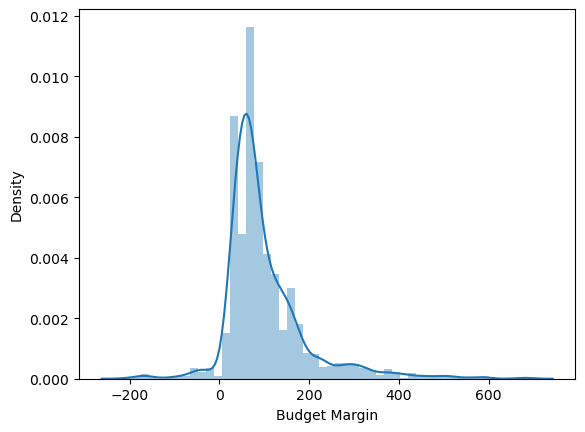

In [24]:
display(data['Budget Margin'].min())
display(data['Budget Margin'].max())
sns.distplot(data['Budget Margin'])
plt.show()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='Budget Margin'>

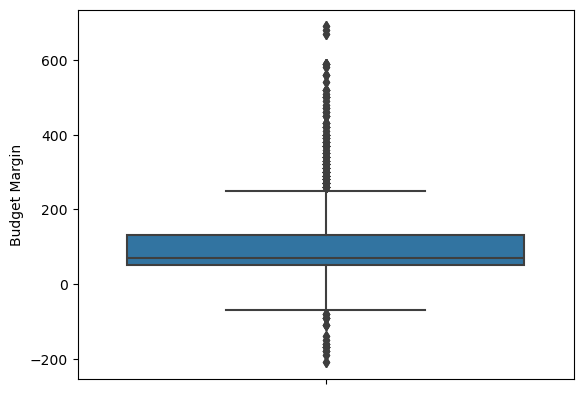

In [25]:
sns.boxplot(data=data, y="Budget Margin")

In [26]:
# More than just a few relevant outliers, below 0, that could be dropped without further insights 

-3534.0

8252.0

C:\Users\49174\AppData\Local\Temp\ipykernel_25196\441790542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Inventory'])
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


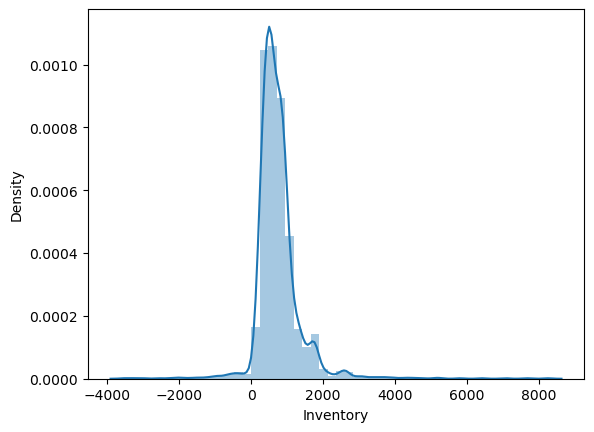

In [27]:
display(data['Inventory'].min())
display(data['Inventory'].max())
sns.distplot(data['Inventory'])
plt.show()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='Inventory'>

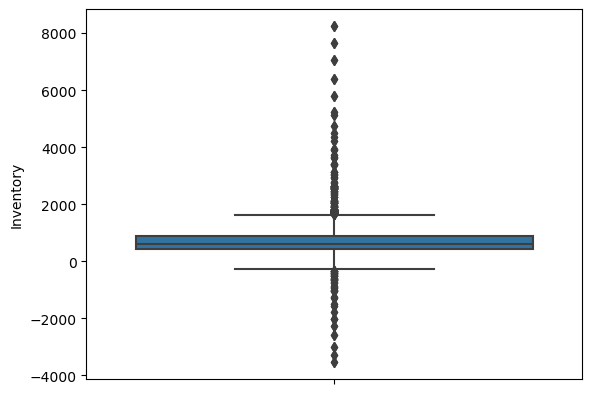

In [28]:
sns.boxplot(data=data, y="Inventory")

In [29]:
# More than just a few relevant outliers, below 0, that could be dropped without further insights 

-302.0

613.0

C:\Users\49174\AppData\Local\Temp\ipykernel_25196\939415652.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Margin'])
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


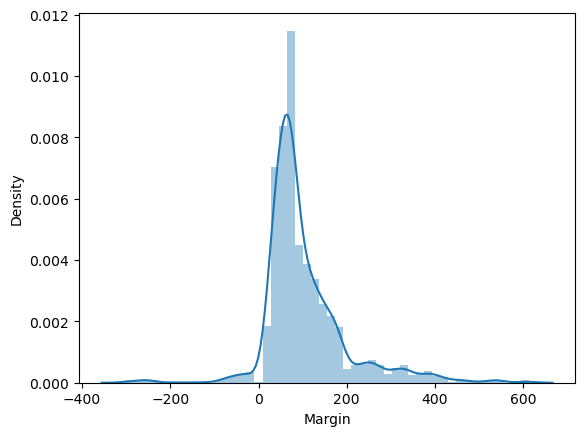

In [30]:
display(data['Margin'].min())
display(data['Margin'].max())
sns.distplot(data['Margin'])
plt.show()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='Margin'>

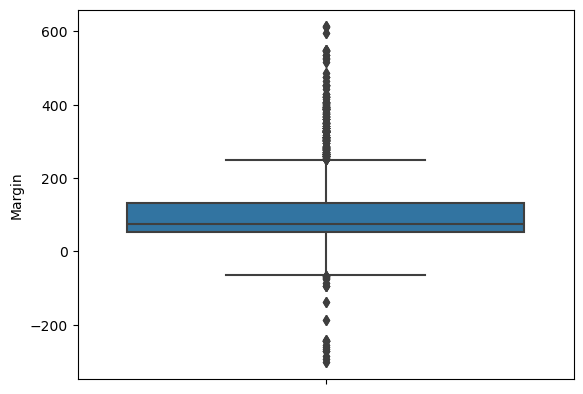

In [31]:
sns.boxplot(data=data, y="Margin")

In [32]:
# More than just a few relevant outliers, below 0, that could be dropped without further insights 
# Their might be other explanations
    # High margins might indicate, that the costs are higher than the profit
    # Negative Inventory values could indicate that the there are more open orders for the product than I have in stock
        # Therefore I could have a negative inventory value
    # Negative Margin could indicate, that my costs are higher than my revenue
        # Take orders from customers even, if I loose money, to keep the customer. It is cheaper to keep a customer than too aquire a new one. 

In [33]:
# https://datatofish.com/line-chart-python-matplotlib/
# https://stackoverflow.com/questions/16992038/how-to-place-inline-labels-in-a-line-plot

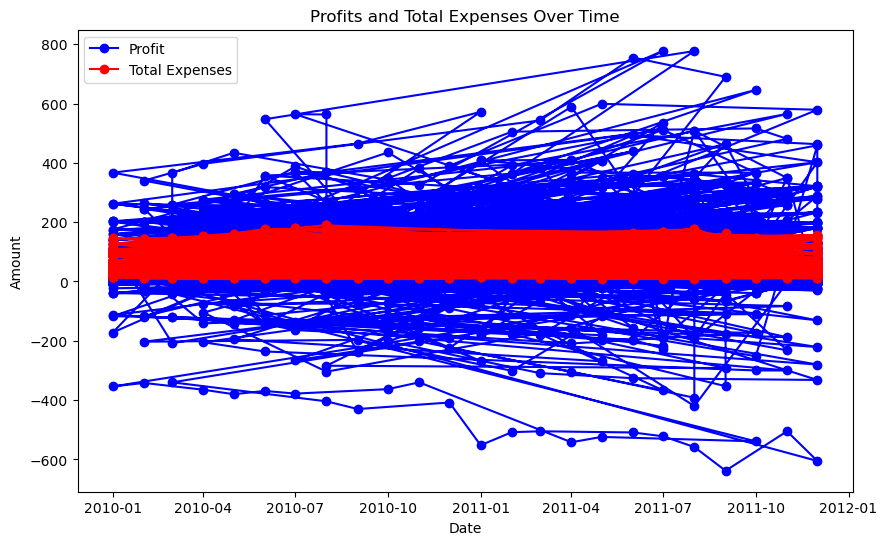

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Profit'], marker='o', linestyle='-', color='b', label='Profit')
plt.plot(data['Date'], data['Total Expenses'], marker='o', linestyle='-', color='r', label='Total Expenses')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Profits and Total Expenses Over Time')
plt.legend()

plt.show()

In [ ]:
# Total Expenses are often higher than the profit

In [ ]:
# I decide not to drop any negative values, since there seem to be plausible explanations for them.

## Summarysing the first insights about the main dataset after preliminary analysis 

* The main dataset has 4248 rows and therefore contains data about 4248 different sales activities.
* The main dataset has 20 columns with data related to the markets, their sales.

* From looking at the preliminary analysis we can see:
    * States: The dataset contains data of 20 different US states.
    * Market: Four unique market categories: East, West, South, Central
    * Market Size: 
Two market size categories: Small Market, Major Market
    * Inventory (min): The minimum value for "Inventory" is listed as -3534. This suggests a negative inventory, which is unusual in most contexts. Inventory is typically a non-negative quantity, so a negative value may be an error or need clarification.
    * Budget Margin (min): The minimum value for "Budget Margin" is listed as -210. This seems unusual for a margin, which is typically a percentage. Margins are usually expressed as positive values or percentages, so a negative value here may be an error or require further explanation.
    * Margin (min): The minimum value for "Margin" is listed as -302. Negative margins are generally uncommon and may indicate an error or require further investigation.
      mns


* Date: numeric column containing dates of the sales. I will need to transform to datetime, split in multiple columns.

# Data cleaning

In [35]:
# Splitting the main dataset into numerical and categorical values to treat numerical and categorical values separateley
categorical_main = data.select_dtypes(include=object)
numerical_main = data.select_dtypes(include=np.number)

In [36]:
print(categorical_main.columns)
print(len(categorical_main.columns))

Index(['State', 'Market', 'Market Size', 'Date', 'Product Type', 'Product',
       'Type'],
      dtype='object')
7


In [37]:
numerical_main.columns
print(len(numerical_main.columns))

18


# Correlations of numerical values

In [38]:
# Look at the correlations of numerical values
correlations = numerical_main.corr()
correlations

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Day,Week,Month,Year,Weekday
Area Code,1.000000,0.013979,2.927834e-02,0.055220,8.047071e-02,0.044552,5.123189e-02,6.799773e-02,1.199399e-02,6.371986e-02,2.287113e-02,4.257203e-02,2.429694e-02,NaN,-1.339571e-02,1.348084e-02,-1.135428e-02,-3.169780e-02
Profit,0.013979,1.000000,9.206041e-01,0.797331,4.648382e-01,0.199976,2.254650e-01,-9.154483e-02,9.376062e-01,4.798618e-01,8.768442e-01,7.588298e-01,-5.869339e-02,NaN,-7.866217e-04,8.030853e-03,1.108570e-01,1.715639e-02
Margin,0.029278,0.920604,1.000000e+00,0.938809,6.787967e-01,0.521254,5.319466e-01,6.125885e-02,9.228119e-01,6.805488e-01,9.634598e-01,9.019808e-01,-7.959521e-02,NaN,-6.415422e-03,1.276869e-02,-9.657632e-14,7.434027e-03
Sales,0.055220,0.797331,9.388095e-01,1.000000,8.866512e-01,0.689350,7.105149e-01,3.259335e-01,8.154348e-01,8.628820e-01,9.207573e-01,9.565376e-01,-4.807745e-02,NaN,2.411693e-03,1.071546e-02,2.725030e-02,1.452921e-02
COGS,0.080471,0.464838,6.787967e-01,0.886651,1.000000e+00,0.782534,8.182707e-01,6.210864e-01,5.149673e-01,9.477621e-01,6.885869e-01,8.499008e-01,2.142304e-03,NaN,-4.951048e-03,1.463609e-02,-1.320827e-13,1.055080e-02
Total Expenses,0.044552,0.199976,5.212543e-01,0.689350,7.825338e-01,1.000000,9.661667e-01,4.337078e-01,2.558112e-01,7.442592e-01,5.307757e-01,6.612171e-01,-7.336890e-02,NaN,6.525742e-03,6.231384e-03,-1.697016e-02,8.738486e-03
Marketing,0.051232,0.225465,5.319466e-01,0.710515,8.182707e-01,0.966167,1.000000e+00,4.977636e-01,2.793152e-01,7.737093e-01,5.430390e-01,6.819459e-01,-4.222699e-02,NaN,-4.631586e-03,1.377227e-02,-1.375801e-13,8.409053e-03
Inventory,0.067998,-0.091545,6.125885e-02,0.325934,6.210864e-01,0.433708,4.977636e-01,1.000000e+00,-1.927503e-02,5.798760e-01,1.193734e-01,3.322164e-01,6.745690e-02,NaN,5.791213e-02,9.603937e-02,-1.441474e-13,3.975407e-03
Budget Profit,0.011994,0.937606,9.228119e-01,0.815435,5.149673e-01,0.255811,2.793152e-01,-1.927503e-02,1.000000e+00,5.791765e-01,9.496366e-01,8.482855e-01,-1.477584e-01,NaN,-1.045934e-02,7.596332e-03,-6.023983e-14,2.576700e-02
Budget COGS,0.063720,0.479862,6.805488e-01,0.862882,9.477621e-01,0.744259,7.737093e-01,5.798760e-01,5.791765e-01,1.000000e+00,7.504222e-01,9.115985e-01,-1.566830e-01,NaN,-7.198978e-03,8.278223e-03,-9.524813e-14,1.111029e-03


In [39]:
# We have to pay attention, that our target Sales is also included in the numerical columns, whose correlations are displayed

In [40]:
# We have significant correlations between features, higher than 0.95
# This features provide us the same information, to the biggest degree. 
# This means we have to drop one of the features which have such a high correlation
# This concerns the combinations:
    # Profit; Budget Profit: 0.937606
    # Margin; Budget Margin: 0.963460

# Also very high calculation: Profit; Margin: 0.920604

# Budget sales is strongly related to my sales (target) and should probably also be dropped to avoid overfitting
# Sales and Budget Sales: 0.956538 

C:\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


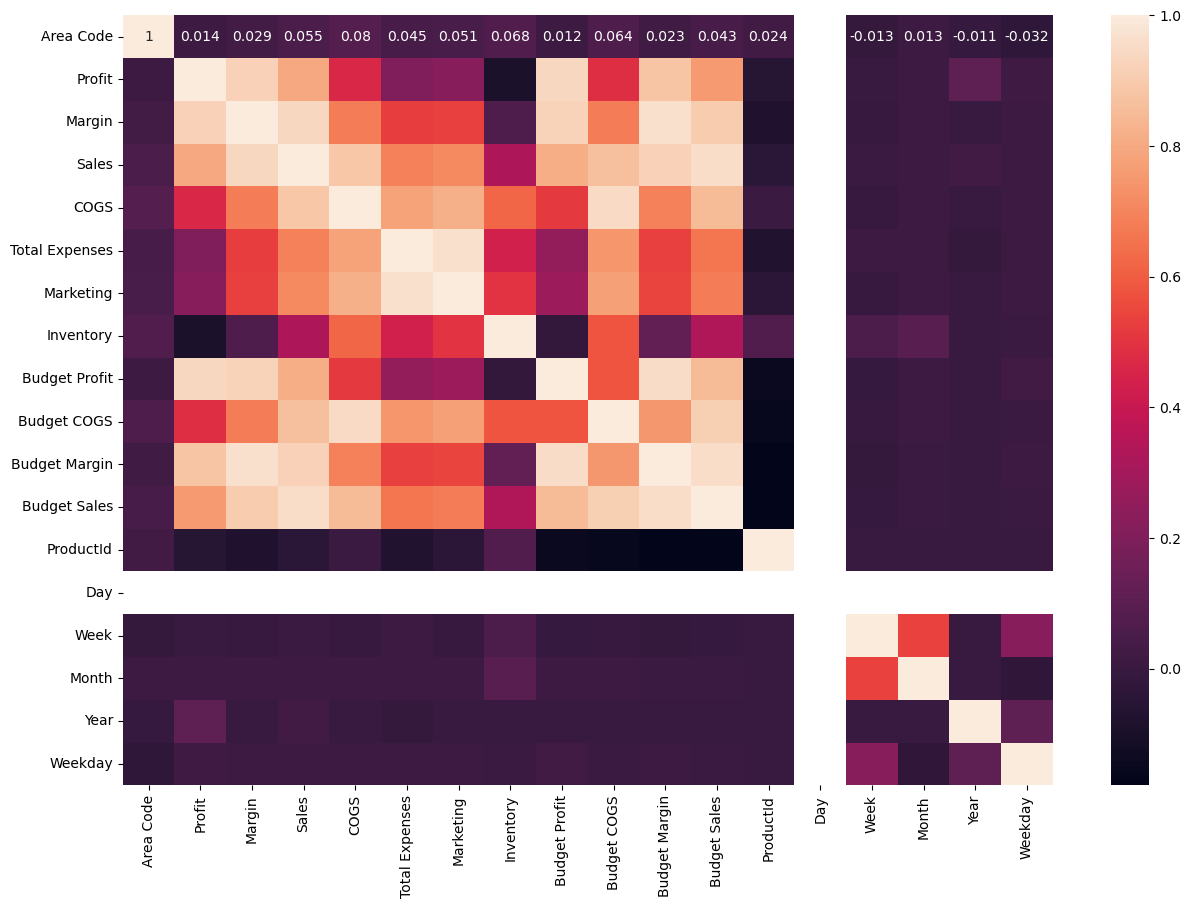

In [41]:
# Heatmap
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(numerical_main.corr(), annot=True)
plt.show()

In [42]:
# Note sales is my target value

# When building a prediction model, I should keep the values I would have before the time of the decision making, which would be my budgets. 
    # Therefore I would drop the columns I would not have the knowledge about before the prediction 

# High Positive Correlations:

    # Profit and Budget Profit: 0.937606
    # Margin and Budget Margin: 0.963459
    # Sales and Budget Sales: 0.955738

# High Negative Correlations:

    # Total Expenses and COGS: -0.782534
    # Marketing and Total Expenses: -0.966167
    # Budget Profit and Marketing: -0.027935

# Columns to drop when modeling, drop them before you start to build the model (Profit and Budget_Profit high correlation)
# Margin and Budget Margin are tighly related to my target, contain too much information about my target value 
# My model was Overfitting when including Margin or Budget Margin, in an attempt to reduce the overfitting I will exclude both of them

columns_to_drop_main_numerical = ['Profit', 'Margin', 'Budget Sales', 'Marketing', 'Budget Margin']

# Correlations of categorical values

There might be some columns that seem to be redundant, check their values to be sure.

In [43]:
# Change dataframe name to categorical_main

In [44]:
categorical_main.columns

Index(['State', 'Market', 'Market Size', 'Date', 'Product Type', 'Product',
       'Type'],
      dtype='object')

In [45]:
# H0 there is no association or between Product Type and Product, they are independent.

In [46]:
# Maybe Product Type and Product
data_crosstab_1 = pd.crosstab(categorical_main['Product Type'], categorical_main['Product'], margins=False)
display(data_crosstab_1)

Product,Amaretto,Caffe Latte,Caffe Mocha,Chamomile,Columbian,Darjeeling,Decaf Espresso,Decaf Irish Cream,Earl Grey,Green Tea,Lemon,Mint,Regular Espresso
Product Type,,,,,,,,,,,,,
Coffee,192,0,0,0,480,0,0,384,0,0,0,0,0
Espresso,0,216,480,0,0,0,408,0,0,0,0,0,72
Herbal Tea,0,0,0,384,0,0,0,0,0,0,480,192,0
Tea,0,0,0,0,0,384,0,0,288,288,0,0,0


In [47]:
import scipy.stats as st
st.chi2_contingency(np.array(data_crosstab_1))

Chi2ContingencyResult(statistic=12744.0, pvalue=0.0, dof=36, expected_freq=array([[ 47.72881356,  53.69491525, 119.3220339 ,  95.45762712,
        119.3220339 ,  95.45762712, 101.42372881,  95.45762712,
         71.59322034,  71.59322034, 119.3220339 ,  47.72881356,
         17.89830508],
       [ 53.15254237,  59.79661017, 132.88135593, 106.30508475,
        132.88135593, 106.30508475, 112.94915254, 106.30508475,
         79.72881356,  79.72881356, 132.88135593,  53.15254237,
         19.93220339],
       [ 47.72881356,  53.69491525, 119.3220339 ,  95.45762712,
        119.3220339 ,  95.45762712, 101.42372881,  95.45762712,
         71.59322034,  71.59322034, 119.3220339 ,  47.72881356,
         17.89830508],
       [ 43.38983051,  48.81355932, 108.47457627,  86.77966102,
        108.47457627,  86.77966102,  92.20338983,  86.77966102,
         65.08474576,  65.08474576, 108.47457627,  43.38983051,
         16.27118644]]))

In [48]:
st.chi2_contingency(data_crosstab_1)[1]

0.0

In [49]:
# p-value of 0.0 suggests that there is a significant association between the 'Product Type' and 'Product' variables 
# p is low, strong evidence to reject the null hypothesis, implying a significant association between the categorical variables 

In [50]:
# One of the features should be dropped for medelling

In [51]:
# Maybe Product Type and Type
data_crosstab_2 = pd.crosstab(categorical_main['Product'], categorical_main['Type'], margins=False)
display(data_crosstab_2)

Type,Decaf,Regular
Product,,
Amaretto,0,192
Caffe Latte,0,216
Caffe Mocha,0,480
Chamomile,384,0
Columbian,0,480
Darjeeling,0,384
Decaf Espresso,408,0
Decaf Irish Cream,384,0
Earl Grey,0,288


In [52]:
st.chi2_contingency(np.array(data_crosstab_2))

Chi2ContingencyResult(statistic=4247.999999999999, pvalue=0.0, dof=12, expected_freq=array([[ 83.52542373, 108.47457627],
       [ 93.96610169, 122.03389831],
       [208.81355932, 271.18644068],
       [167.05084746, 216.94915254],
       [208.81355932, 271.18644068],
       [167.05084746, 216.94915254],
       [177.49152542, 230.50847458],
       [167.05084746, 216.94915254],
       [125.28813559, 162.71186441],
       [125.28813559, 162.71186441],
       [208.81355932, 271.18644068],
       [ 83.52542373, 108.47457627],
       [ 31.3220339 ,  40.6779661 ]]))

In [53]:
st.chi2_contingency(data_crosstab_2)[1]

0.0

In [54]:
# p-value of 0.0 suggests that there is a significant association between the 'Product' and 'Type' variables 
# p is low, strong evidence to reject the null hypothesis, implying a significant association between the categorical variables 

In [55]:
# One of the features should be dropped for modelling 

In [56]:
# Maybe Market and Market Size
data_crosstab_3 = pd.crosstab(categorical_main['Market'], categorical_main['Market Size'], margins=False)
display(data_crosstab_1)

Product,Amaretto,Caffe Latte,Caffe Mocha,Chamomile,Columbian,Darjeeling,Decaf Espresso,Decaf Irish Cream,Earl Grey,Green Tea,Lemon,Mint,Regular Espresso
Product Type,,,,,,,,,,,,,
Coffee,192,0,0,0,480,0,0,384,0,0,0,0,0
Espresso,0,216,480,0,0,0,408,0,0,0,0,0,72
Herbal Tea,0,0,0,384,0,0,0,0,0,0,480,192,0
Tea,0,0,0,0,0,384,0,0,288,288,0,0,0


In [57]:
st.chi2_contingency(np.array(data_crosstab_3))

Chi2ContingencyResult(statistic=515.1533643472255, pvalue=2.4809453334440276e-111, dof=3, expected_freq=array([[539.11864407, 804.88135593],
       [356.20338983, 531.79661017],
       [269.55932203, 402.44067797],
       [539.11864407, 804.88135593]]))

In [58]:
st.chi2_contingency(data_crosstab_3)[1]

2.4809453334440276e-111

In [59]:
# p-value is close to 0, suggests that there is a significant association between Market and Market Size

In [60]:
# Columns to drop when modeling, dropp them before you start to build the model

columns_to_drop_main_categorical = ['Product Type', 'Type', 'Market Size']

# Getting the Latitude and Longitude vlaues for the API request

In [61]:
print(data['State'].unique())

['Connecticut' 'Washington' 'California' 'Texas' 'New York' 'Ohio'
 'Illinois' 'Louisiana' 'Florida' 'Wisconsin' 'Colorado' 'Missouri' 'Iowa'
 'Massachusetts' 'Oklahoma' 'Utah' 'Oregon' 'New Mexico' 'New Hampshire'
 'Nevada']


In [62]:
print(data['Area Code'].unique())

[203 206 209 210 212 213 214 216 217 224 225 234 239 253 254 262 281 303
 305 309 310 312 314 315 318 319 321 323 325 330 337 339 347 351 352 360
 361 386 405 407 408 409 413 414 415 417 419 425 430 432 435 440 469 475
 503 504 505 508 509 510 512 513 515 516 518 530 541 559 561 562 563 567
 573 580 585 603 607 608 614 617 618 619 626 630 631 636 641 646 650 660
 661 682 702 707 708 712 713 714 715 716 718 719 720 727 740 754 760 772
 773 774 775 781 786 801 805 806 813 815 816 817 818 830 831 832 845 847
 850 857 858 860 863 903 904 909 914 915 916 917 918 920 925 936 937 940
 941 949 951 954 956 959 970 971 972 978 979 985]


In [63]:
# Create a list of area codes
area_codes = [data['Area Code'].unique()]
area_codes

[array([203, 206, 209, 210, 212, 213, 214, 216, 217, 224, 225, 234, 239,
        253, 254, 262, 281, 303, 305, 309, 310, 312, 314, 315, 318, 319,
        321, 323, 325, 330, 337, 339, 347, 351, 352, 360, 361, 386, 405,
        407, 408, 409, 413, 414, 415, 417, 419, 425, 430, 432, 435, 440,
        469, 475, 503, 504, 505, 508, 509, 510, 512, 513, 515, 516, 518,
        530, 541, 559, 561, 562, 563, 567, 573, 580, 585, 603, 607, 608,
        614, 617, 618, 619, 626, 630, 631, 636, 641, 646, 650, 660, 661,
        682, 702, 707, 708, 712, 713, 714, 715, 716, 718, 719, 720, 727,
        740, 754, 760, 772, 773, 774, 775, 781, 786, 801, 805, 806, 813,
        815, 816, 817, 818, 830, 831, 832, 845, 847, 850, 857, 858, 860,
        863, 903, 904, 909, 914, 915, 916, 917, 918, 920, 925, 936, 937,
        940, 941, 949, 951, 954, 956, 959, 970, 971, 972, 978, 979, 985],
       dtype=int64)]

In [64]:
# Create a list of area codes containing only string values 
area_codes_as_strings = []
for area_code in area_codes:
    area_codes_as_strings.append(str(area_code))

In [65]:
# Get the respective Latitude and Longitude for all the area codes in the list of strings area_codes_as_strings
    # Create add Latitude and Longitude to the dataframe in order to be able to concatenate the dataframe with my weather data.

In [66]:
import requests

In [67]:
# Use the Google Geocoding API to get the Latitude and Longitude for each area code in the list area_codes_as_strings
for area_code in area_codes_as_strings:
    base_url = "https://maps.googleapis.com/maps/api/geocode/json?address=" + area_code
    response = requests.get(base_url)
    data_La_Lo = response.json()

In [68]:
data_La_Lo

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account',
 'results': [],
 'status': 'REQUEST_DENIED'}

In [69]:
# I do not want to pay for this key so I need a different approach

In [70]:
data['area_code_and_state'] = data['Area Code'].astype(str) + ' ' + data['State']

In [71]:
data.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,...,Date,Product Type,Product,Type,Day,Week,Month,Year,Weekday,area_code_and_state
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,2010-04-01 00:00:00,Coffee,Columbian,Regular,1,13,4,2010,3,203 Connecticut
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,2010-07-01 00:00:00,Coffee,Columbian,Regular,1,26,7,2010,3,203 Connecticut
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,...,2010-11-01 00:00:00,Coffee,Columbian,Regular,1,44,11,2010,0,203 Connecticut
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,...,2010-12-01 00:00:00,Coffee,Columbian,Regular,1,48,12,2010,2,203 Connecticut
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,...,2011-07-01 00:00:00,Coffee,Columbian,Regular,1,26,7,2011,4,203 Connecticut


In [72]:
# Create a new column area_code_and_state, reason is that I want to use OpenCageGeocode which alows me only 2500 requests per day
# I run into the error max request or something like that
# I will try to search for my unique values only to stay under this request limitation
# I still want to use Area Code and state for the query to avoid doubles of area codes somewhere else which would give me wrong coordinates

# Print the unique values in the new column
print(data['area_code_and_state'].unique())

['203 Connecticut' '206 Washington' '209 California' '210 Texas'
 '212 New York' '213 California' '214 Texas' '216 Ohio' '217 Illinois'
 '224 Illinois' '225 Louisiana' '234 Ohio' '239 Florida' '253 Washington'
 '254 Texas' '262 Wisconsin' '281 Texas' '303 Colorado' '305 Florida'
 '309 Illinois' '310 California' '312 Illinois' '314 Missouri'
 '315 New York' '318 Louisiana' '319 Iowa' '321 Florida' '323 California'
 '325 Texas' '330 Ohio' '337 Louisiana' '339 Massachusetts' '347 New York'
 '351 Massachusetts' '352 Florida' '360 Washington' '361 Texas'
 '386 Florida' '405 Oklahoma' '407 Florida' '408 California' '409 Texas'
 '413 Massachusetts' '414 Wisconsin' '415 California' '417 Missouri'
 '419 Ohio' '425 Washington' '430 Texas' '432 Texas' '435 Utah' '440 Ohio'
 '469 Texas' '475 Connecticut' '503 Oregon' '504 Louisiana'
 '505 New Mexico' '508 Massachusetts' '509 Washington' '510 California'
 '512 Texas' '513 Ohio' '515 Iowa' '516 New York' '518 New York'
 '530 California' '541 Oregon'

In [73]:
# Use getpass to securely input the API key without displaying it

import requests
import getpass
api_key = getpass.getpass()

 ········


In [74]:
# https://opencagedata.com/api
    # Forward geocoding
    # https://api.opencagedata.com/geocode/v1/json?q=URI-ENCODED-PLACENAME&key=YOUR-API-KEY

In [ ]:
import requests
import json
from pandas import json_normalize
import getpass

# Initialize an empty list
locations = []

# Iterate over unique values in the 'area_code_and_state' column
# The URL pattern I got form the site https://opencagedata.com/api like mentioned above
# I use my query as place name and my defined key
# Use the Code from the lesson 6.04-2
    # res = requests.get()
    # out = res.json()
# 200 OK (zero or more results will be returned) https://opencagedata.com/api

for query in data['area_code_and_state'].unique():
    # Make a request to OpenCage Geocoding API
    url = f'https://api.opencagedata.com/geocode/v1/json?q={query}&key={api_key}'
    response = requests.get(url)

    # Checks for status 200 = OK (zero or more results will be returned)
    # When Coordinates can be found attach them to my list, if not add Null values, to avoid errors.
    if response.status_code == 200:
        result = response.json()
        locations.append(result)
    else:
        locations.append(None)


In [ ]:
locations

In [ ]:
# Display the JSON response
print(json.dumps(locations, indent=6))

In [ ]:
# Lesson 6.04
# from pandas import json_normalize
# flattened_data = json_normalize(data)

In [ ]:
from pandas import json_normalize

flattened_df = json_normalize(locations[-1]['results'])

# Display the flattened DataFrame
print(flattened_df)

In [ ]:
flattened_df['geometry.lat'] = flattened_df['geometry.lat'].astype(float)
flattened_df['geometry.lng'] = flattened_df['geometry.lng'].astype(float)

# Display the DataFrame with flattened latitude and longitude
print(flattened_df[['formatted', 'geometry.lat', 'geometry.lng']])

In [ ]:
display(flattened_df)

In [ ]:
flattened_df.columns

In [ ]:
flattened_df['geometry.lat'][1]

In [ ]:
flattened_df['geometry.lng'][1]

In [ ]:
# To be sure to not have any errors I will proceed with Code specific to this Website
    # I will use the insights gathered from the json process above 

In [ ]:
# https://stackoverflow.com/questions/60370821/find-latitude-and-longitude-using-city-and-state-columns
# https://github.com/ravisorg/Area-Code-Geolocation-Database

The pattern I can use for my request

from opencage.geocoder import OpenCageGeocode
key = 'my_key'  # get api key from : https://opencagedata.com
geocoder = OpenCageGeocode(key)
list_lat = []   # create empty lists

list_long = []
for index, row in train.iterrows(): # iterate over rows in dataframe



City = row['CITY']
State = row['STATE']       
query = str(City)+','+str(State)

results = geocoder.geocode(query)   
lat = results[0]['geometry']['lat']
long = results[0]['geometry']['lng']

list_lat.append(lat)
list_long.append(long)

# create new columns from lists    

train['lat'] = list_lat   

test['lon'] = list_long

In [ ]:
#pip install opencage

In [75]:
from opencage.geocoder import OpenCageGeocode

In [76]:
geocoder = OpenCageGeocode(api_key)

In [77]:
# create empty lists
list_lat = []  
list_long = []

# Iterate over unique values in the 'area_code_and_state' column
for query in data['area_code_and_state'].unique():
    results = geocoder.geocode(query)

    if results and len(results) > 0:
        lat = results[0]['geometry']['lat']
        lon = results[0]['geometry']['lng']
        list_lat.append(lat)
        list_long.append(lon)
    else:
        list_lat.append(None)
        list_long.append(None)



In [78]:
print(list_lat)
print(list_long)

[41.8187805, 48.4544055, 33.9458237, 31.487652, 41.0188704, 32.822116, 27.5366011, 41.135497, 41.9109119, 41.7046794, 30.0055228, 39.1382172, 28.9961477, 46.6593782, 30.4730105, 43.0390301, 32.7276193, 39.7105221, 30.3596255, 42.0195332, 37.7849516, 41.1139402, 39.4290117, 40.7898014, 29.9683718, 41.5864918, 26.0346815, 34.4048154, 32.7833712, 39.1528069, 32.6864565, 42.3234884, 42.155503, 42.3383287, 28.9117072, 47.3992555, 32.4994921, 30.4347762, 36.1264242, 30.0377525, 33.944787, 29.4384599, 42.6952843, 43.0555373, 33.944059, 38.5766721, 41.3713651, 46.0449349, 29.4362314, 32.1113342, 40.7196493, 38.8515608, 33.2331157, 41.7424548, 45.5266342, 30.9717867, 35.1721291, 42.2576187, 47.0372494, 37.7907978, 30.3998293, 40.6468105, 42.7494978, 40.7515838, 40.7511534, 33.8711033, 44.0654816, 33.6765938, 26.1277804, 33.6765938, 41.6272288, 39.1027277, 38.5716045, 35.5377266, 46.1209422, 33.7157856, 40.8333245, 43.0029556, 41.3997404, 42.3109658, 41.7618084, 32.812912, 34.0482839, 41.8920118

In [ ]:
# There seems to be an issue with Some of the Longitude and Latitude values
    # http://dhmontgomery.com/2018/02/population-latitude/
    # 25th parallel (the southern tip of Florida) to the 49th parallel (the northern borders of Washington, Montana, North Dakota and Minnesota — minus the Northwest Angle), 
    # and from the 67th meridian (the tip of Maine) to the 125th meridian (just past Washington’s Olympic Peninsula).
    

In [79]:
# At least one value is too small
min_value = min(list_lat)
max_value = max(list_lat)
print(min_value)
print(max_value)

-33.4410538
48.4544055


In [80]:
# This values are all within the longitude range 
min_value_long = min(list_long)
max_value_long = max(list_long)
print(min_value_long)
print(max_value_long)

-123.1124979
-64.2284098


In [81]:
# I will have to clean the wrong values at a later step

In [82]:
area_code_and_state = data['area_code_and_state'].unique()

In [83]:
len(area_code_and_state)

156

In [84]:
# Create a DataFrame
df = pd.DataFrame({
    'area_code_and_state': area_code_and_state,
    'latitude': list_lat,
    'longitude': list_long
})

# Display the DataFrame
display(df)

,area_code_and_state,latitude,longitude
0,203 Connecticut,41.818781,-72.305976
1,206 Washington,48.454406,-122.610664
2,209 California,33.945824,-118.413871
3,210 Texas,31.487652,-98.520487
4,212 New York,41.018870,-72.308525
...,...,...,...
151,971 Oregon,42.045676,-123.112498
152,972 Texas,29.583579,-98.928001
153,978 Massachusetts,42.477337,-70.891471
154,979 Texas,30.263268,-97.696296


In [85]:
data.head()
data.shape

(4248, 26)

In [191]:
# (how='left'), meaning that all the rows from the original dataframe data will be included in the merged dataframe, and only matching rows from the second dataframe df will be added.
# This should work, since the df column area_code_and_state contains only unique values from the same column in dataframe data

merged_df = pd.merge(data, df, on='area_code_and_state', how='left')

In [192]:
display(merged_df)

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,...,Product,Type,Day,Week,Month,Year,Weekday,area_code_and_state,latitude,longitude
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,Columbian,Regular,1,13,4,2010,3,203 Connecticut,41.818781,-72.305976
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,Columbian,Regular,1,26,7,2010,3,203 Connecticut,41.818781,-72.305976
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,...,Columbian,Regular,1,44,11,2010,0,203 Connecticut,41.818781,-72.305976
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,...,Columbian,Regular,1,48,12,2010,2,203 Connecticut,41.818781,-72.305976
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,...,Columbian,Regular,1,26,7,2011,4,203 Connecticut,41.818781,-72.305976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,985,Louisiana,South,Small Market,-6.0,66.0,113.0,47.0,72.0,42.0,...,Caffe Latte,Regular,1,26,7,2010,3,985 Louisiana,-33.441054,-70.745874
4244,985,Louisiana,South,Small Market,-7.0,61.0,105.0,44.0,68.0,39.0,...,Caffe Latte,Regular,1,30,8,2010,6,985 Louisiana,-33.441054,-70.745874
4245,985,Louisiana,South,Small Market,-3.0,76.0,131.0,55.0,79.0,49.0,...,Caffe Latte,Regular,1,48,12,2010,2,985 Louisiana,-33.441054,-70.745874
4246,985,Louisiana,South,Small Market,1.0,87.0,160.0,63.0,86.0,57.0,...,Caffe Latte,Regular,1,13,4,2011,4,985 Louisiana,-33.441054,-70.745874


In [193]:
merged_df.isna().sum()

Area Code              0
State                  0
Market                 0
Market Size            0
Profit                 0
Margin                 0
Sales                  0
COGS                   0
Total Expenses         0
Marketing              0
Inventory              0
Budget Profit          0
Budget COGS            0
Budget Margin          0
Budget Sales           0
ProductId              0
Date                   0
Product Type           0
Product                0
Type                   0
Day                    0
Week                   0
Month                  0
Year                   0
Weekday                0
area_code_and_state    0
latitude               0
longitude              0
dtype: int64

In [194]:
len(merged_df['latitude'].unique())

155

In [195]:
len(merged_df['longitude'].unique())

155

In [91]:
# Filter the Latitude and Longitude Value for US
#  25th parallel (the southern tip of Florida) to the 49th parallel 
# (the northern borders of Washington, Montana, North Dakota and Minnesota — minus the Northwest Angle), and from the 67th meridian (the tip of Maine) to the 125th meridian (just past Washington’s Olympic Peninsula).

In [92]:
# DataFrame Filtering: Example from lesson
# target_customers = data2.loc[(data2['total_claim_amount'] >= 532.8) & (data2['customer_lifetime_value'] <= 4048.535)]
# display(target_customers.shape)

In [93]:
# (merged_df['latitude'] >= 25) & (merged_df['latitude'] <= 49): 
    # This creates a boolean mask by checking two conditions for each element in the 'latitude' column. It checks if the latitude is greater than or equal to 25 AND less than or equal to 49.

# merged_df.loc[...]: 
    # This uses the boolean mask to index the rows of the DataFrame merged_df. It selects only the rows where the 

In [196]:
merged_df['latitude']

0       41.818781
1       41.818781
2       41.818781
3       41.818781
4       41.818781
          ...    
4243   -33.441054
4244   -33.441054
4245   -33.441054
4246   -33.441054
4247   -33.441054
Name: latitude, Length: 4248, dtype: float64

In [197]:
merged_df['longitude']

0      -72.305976
1      -72.305976
2      -72.305976
3      -72.305976
4      -72.305976
          ...    
4243   -70.745874
4244   -70.745874
4245   -70.745874
4246   -70.745874
4247   -70.745874
Name: longitude, Length: 4248, dtype: float64

In [96]:
# I set the restrictions to only inlcude values within the longitude and latitude of the US 

In [198]:
latitude_US = merged_df.loc[(merged_df['latitude'] >= 25) & (merged_df['latitude'] <= 49)]

In [199]:
longitude_US = merged_df.loc[(merged_df['longitude'] >= -125) & (merged_df['longitude'] <= -67)]

In [200]:
print(len(latitude_US))
type(latitude_US)

4098


pandas.core.frame.DataFrame

In [201]:
print(len(longitude_US))
type(longitude_US)

4128


pandas.core.frame.DataFrame

In [202]:
# I have to create a list of latitude and longitude to add this lists to my query for the weather API
# It should only contain the correct latitude and longitude vlaues
    # I could dropp the worng ones or check 

In [203]:
display(latitude_US['latitude'])

0       41.818781
1       41.818781
2       41.818781
3       41.818781
4       41.818781
          ...    
4213    30.263268
4214    30.263268
4215    30.263268
4216    30.263268
4217    30.263268
Name: latitude, Length: 4098, dtype: float64

In [204]:
display(longitude_US['longitude'])

0      -72.305976
1      -72.305976
2      -72.305976
3      -72.305976
4      -72.305976
          ...    
4243   -70.745874
4244   -70.745874
4245   -70.745874
4246   -70.745874
4247   -70.745874
Name: longitude, Length: 4128, dtype: float64

In [221]:
# Rounding column values to two decimals (should be still excat enough for weather)
latitude_US['latitude'] = latitude_US['latitude'].round(decimals = 2)
longitude_US['longitude'] = longitude_US['longitude'].round(decimals = 2)

C:\Users\49174\AppData\Local\Temp\ipykernel_25196\3084282584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  longitude_US['longitude'] = longitude_US['longitude'].round(decimals = 2)


In [222]:
latitude_US['latitude'].head()

0    41.82
1    41.82
2    41.82
3    41.82
4    41.82
Name: latitude, dtype: float64

In [223]:
longitude_US['longitude'].head()

0   -72.31
1   -72.31
2   -72.31
3   -72.31
4   -72.31
Name: longitude, dtype: float64

In [224]:
# All the values I have a limit of 10.000 API calls per day, this should work hopefully
latitude_US['latitude']
print(len(latitude_US))

4098


In [225]:
# Assign this to the column latitude in my original dataframe merged_df

In [226]:
merged_df['latitude'] = latitude_US['latitude']
print(len(merged_df['latitude']))

4098


In [227]:
merged_df['latitude'] = latitude_US['latitude']
print(len(merged_df['latitude']))

4098


In [228]:
merged_df['longitude'] = longitude_US['longitude']
print(len(merged_df['longitude']))

4098


In [229]:
merged_df['latitude'].isna().sum()

0

In [230]:
merged_df['longitude'].isna().sum()

0

In [231]:
merged_df.dropna(subset=['latitude'], inplace=True)

In [232]:
print(merged_df['latitude'].isna().sum())
print(len(merged_df['latitude']))

0
4098


In [233]:
merged_df.dropna(subset=['longitude'], inplace=True)

In [234]:
print(merged_df['longitude'].isna().sum())
print(len(merged_df['longitude']))

0
4098


In [ ]:
# For the test of my final Code for the API I created the test dataframe df1 with only 5 columns

Create an empty DataFrame for df1 with 'longitude' and 'latitude' columns
df1 = pd.DataFrame(columns=['longitude', 'latitude'])

Iterate through the first 5 rows
for index, row in merged_df.head(5).iterrows():
    # Append values to the new DataFrame df1
    df1.loc[len(df1)] = {'longitude': row['longitude'], 'latitude': row['latitude']}

df1['latitude']

df1['longitude']

In [ ]:
# After succesfully testing with a df1 with 5 columns
# now I will search only for the unique values of date and (langitude and latitude)

In [ ]:
# Get my unique locations, I do not have the exact store locations, only the area Code and State they are in
    # From this I got the longitude and latitude values for area Code and State 
    # Now I filter for all unique points this generated (by dropping duplicates for the targeted values)
        # https://stackoverflow.com/questions/54867061/how-to-detect-almost-duplicate-locations-in-a-pandas-dataframe

In [ ]:
# double brackets are used to create a DataFrame containing only the specified columns 'latitude' and 'longitude'
# The inner brackets create a list of column names, the outer brackets are used to select those columns from the DataFrame

In [235]:
unique_locations = merged_df[['latitude', 'longitude']].drop_duplicates()

In [236]:
len(unique_locations)

145

In [237]:
unique_locations.head()

,latitude,longitude
0,41.82,-72.31
50,48.45,-122.61
130,33.95,-118.41
146,31.49,-98.52
152,41.02,-72.31


In [238]:
type(unique_locations)

pandas.core.frame.DataFrame

In [122]:
# unique_locations.reset_index(drop=True)

In [123]:
df1 = unique_locations

Using all my latitude longitude values with all dates form 2010 and 2011 would give me an output of over 2 milion rows form API query

Create an empty DataFrame for df1 with 'longitude' and 'latitude' columns
df1 = pd.DataFrame(columns=['longitude', 'latitude'])

Iterate through all rows of the dataframe and append the values to the new df1 columns ['longitude', 'latitude']
for index, row in merged_df.head(5).iterrows():
    # Append values to the new DataFrame df1
    df1.loc[len(df1)] = {'longitude': row['longitude'], 'latitude': row['latitude']}

for index, row in merged_df.iterrows():: This line initiates a loop that iterates over the rows of the DataFrame merged_df. index represents the index of the current row, and row is a Pandas Series representing the data in the current row.

df1.loc[len(df1)]: This part is using the .loc accessor to access a specific location in the DataFrame df1. The location is determined by the length of df1, so len(df1) represents the next available index in df1. 

{'longitude': row['longitude'], 'latitude': row['latitude']}: This is a dictionary that contains the data to be added to the new row. The keys in the dictionary are the column names ('longitude' and 'latitude'), and the values are obtained from the current row of the DataFrame merged_df. Specifically, it's taking the 'longitude' and 'latitude' values from the current row using row['longitude'] and row['latitude'].

In [ ]:
# Create csv to test in a separate notebook
# df1.to_csv('output_file.csv', index=False)

In [124]:
len(df1['latitude'])

145

In [125]:
len(df1['longitude'])

145

# Import the weather dataframe

In [ ]:
# pip install openmeteo-requests
#!pip install openmeteo-requests requests-cache retry-requests numpy pandas

In [ ]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry

In [ ]:
# TRY the first request with 1 row
    # Look into the values you receive

In [ ]:
# Code for the entered values gets automatically generated on the website, when choosing Python
# https://open-meteo.com/en/docs/historical-weather-api#latitude=52.52,48&longitude=13.41,30&start_date=2023-11-08&end_date=2023-11-08&hourly=&daily=temperature_2m_mean,daylight_duration,sunshine_duration,rain_sum,snowfall_sum

Example Code

import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

Make sure all required weather variables are listed here
The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": [52.52, 48],
	"longitude": [13.41, 30],
	"start_date": "2023-11-08",
	"end_date": "2023-11-08",
	"daily": ["temperature_2m_mean", "daylight_duration", "sunshine_duration", "rain_sum", "snowfall_sum"]
}
responses = openmeteo.weather_api(url, params=params)

Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()
daily_daylight_duration = daily.Variables(1).ValuesAsNumpy()
daily_sunshine_duration = daily.Variables(2).ValuesAsNumpy()
daily_rain_sum = daily.Variables(3).ValuesAsNumpy()
daily_snowfall_sum = daily.Variables(4).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s"),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s"),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["daylight_duration"] = daily_daylight_duration
daily_data["sunshine_duration"] = daily_sunshine_duration
daily_data["rain_sum"] = daily_rain_sum
daily_data["snowfall_sum"] = daily_snowfall_sum

daily_dataframe = pd.DataFrame(data = daily_data)
print(daily_dataframe)

In [ ]:
# Following Code works for one row 
    # I have to test if my request works, since I only have a limit budget of 10.000 request on the site per day. 

Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

Make sure all required weather variables are listed here
The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": df1['latitude'].iloc[0],
	"longitude": df1['longitude'].iloc[0],
	"start_date": "2023-11-08",
	"end_date": "2023-11-08",
	"daily": ["temperature_2m_mean", "daylight_duration", "sunshine_duration", "rain_sum", "snowfall_sum"]
}
responses = openmeteo.weather_api(url, params=params)

df1['latitude'].iloc[0]: This is an indexing method used to select the value at the specific location in the DataFrame. In this case, it's selecting the value at the first row (index 0) of the 'latitude' column.

Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_daylight_duration = daily.Variables(0).ValuesAsNumpy()
daily_sunshine_duration = daily.Variables(1).ValuesAsNumpy()
daily_rain_sum = daily.Variables(2).ValuesAsNumpy()
daily_snowfall_sum = daily.Variables(3).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s"),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s"),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["daylight_duration"] = daily_daylight_duration
daily_data["sunshine_duration"] = daily_sunshine_duration
daily_data["rain_sum"] = daily_rain_sum
daily_data["snowfall_sum"] = daily_snowfall_sum

daily_dataframe = pd.DataFrame(data = daily_data)
print(daily_dataframe)

daily_dataframe

In [ ]:
# Succesful extracted one row form the dataframe

In [ ]:
# Now I have to add the for loops to go through all rows of my dataframe
    # I tested this first with a dataframe df1, that only contains the first 5 rows of my dataframe

In [ ]:
# Works for all rows in the dataframe (Now also choose the correct dates needed for my dataframe!

In [126]:
merged_df.head(1)

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,...,Product,Type,Day,Week,Month,Year,Weekday,area_code_and_state,latitude,longitude
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,Columbian,Regular,1,13,4,2010,3,203 Connecticut,41.82,-72.31


In [127]:
merged_df['Date'].value_counts()

Date
2011-01-01    173
2010-11-01    172
2011-06-01    172
2010-05-01    172
2011-10-01    172
2011-11-01    172
2010-06-01    172
2011-12-01    172
2010-07-01    172
2010-04-01    171
2011-03-01    171
2010-03-01    171
2010-02-01    171
2011-02-01    171
2011-09-01    171
2011-08-01    171
2010-01-01    171
2011-04-01    170
2011-05-01    169
2010-10-01    169
2010-08-01    169
2011-07-01    169
2010-12-01    168
2010-09-01    167
Name: count, dtype: int64

In [128]:
unique_dates = merged_df['Date'].unique()
unique_dates

array([Timestamp('2010-04-01 00:00:00'), Timestamp('2010-07-01 00:00:00'),
       Timestamp('2010-11-01 00:00:00'), Timestamp('2010-12-01 00:00:00'),
       Timestamp('2011-07-01 00:00:00'), Timestamp('2011-08-01 00:00:00'),
       Timestamp('2011-09-01 00:00:00'), Timestamp('2011-10-01 00:00:00'),
       Timestamp('2011-11-01 00:00:00'), Timestamp('2010-06-01 00:00:00'),
       Timestamp('2010-10-01 00:00:00'), Timestamp('2011-01-01 00:00:00'),
       Timestamp('2011-02-01 00:00:00'), Timestamp('2011-03-01 00:00:00'),
       Timestamp('2011-04-01 00:00:00'), Timestamp('2011-05-01 00:00:00'),
       Timestamp('2011-12-01 00:00:00'), Timestamp('2010-02-01 00:00:00'),
       Timestamp('2010-05-01 00:00:00'), Timestamp('2010-08-01 00:00:00'),
       Timestamp('2010-03-01 00:00:00'), Timestamp('2010-09-01 00:00:00'),
       Timestamp('2011-06-01 00:00:00'), Timestamp('2010-01-01 00:00:00')],
      dtype=object)

In [129]:
unique_dates_df = pd.DataFrame({'Date': unique_dates})
unique_dates_df

,Date
0,2010-04-01
1,2010-07-01
2,2010-11-01
3,2010-12-01
4,2011-07-01
5,2011-08-01
6,2011-09-01
7,2011-10-01
8,2011-11-01
9,2010-06-01


In [130]:
unique_dates_df.to_csv("unique_dates.csv", index=False)

In [131]:
unique_combinations_df = pd.merge(unique_dates_df, merged_df[['latitude', 'longitude']].drop_duplicates(), how='cross')
unique_combinations_df

,Date,latitude,longitude
0,2010-04-01,41.82,-72.31
1,2010-04-01,48.45,-122.61
2,2010-04-01,33.95,-118.41
3,2010-04-01,31.49,-98.52
4,2010-04-01,41.02,-72.31
...,...,...,...
3475,2010-01-01,40.15,-105.12
3476,2010-01-01,42.05,-123.11
3477,2010-01-01,29.58,-98.93
3478,2010-01-01,42.48,-70.89


In [132]:
unique_lat_lon_df = merged_df[['latitude', 'longitude']].drop_duplicates()
unique_lat_lon_df

,latitude,longitude
0,41.82,-72.31
50,48.45,-122.61
130,33.95,-118.41
146,31.49,-98.52
152,41.02,-72.31
...,...,...
4023,40.15,-105.12
4104,42.05,-123.11
4191,29.58,-98.93
4196,42.48,-70.89


In [133]:
unique_lat_lon_df.to_csv("unique_lat_lon.csv", index=False)

In [ ]:
# Parts of the following Code patterns get generated by https://open-meteo.com/en/docs/historical-weather-api
    # When going to Historical weather
    # I had to add loops to the Code, since the pattern is only for ine request and a time frame with start and end date
    # I had to add a counter because of the request limitation of 600 per minuit
    # I had to create new dataframes as input for the parameters which would fit to my dataframe and not exeed the request maximum
    # It was a lot of work, not just copy and pasting from the site!

This is an example output of Code from https://open-meteo.com/en/docs/historical-weather-api which I had to adapt to my usecase!

import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

Make sure all required weather variables are listed here
The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 52.52,
	"longitude": 13.41,
	"start_date": "2023-11-28",
	"end_date": "2023-12-12",
	"hourly": "temperature_2m"
}
responses = openmeteo.weather_api(url, params=params)

Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s"),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s"),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

In [ ]:
# Chose as start date 2010-01-01 and end date 2011-12-31 to cover all possible values for 2010 and 2011
    # Would produce 2 million rows not possible

In [ ]:
#df1 = pd.read_csv('output_file.csv')

In [ ]:
# https://stackoverflow.com/questions/75401739/iterating-through-a-dataframe-to-obtain-location-data-from-coordinates
# https://stackoverflow.com/questions/50607119/adding-a-new-row-to-a-dataframe-why-loclendf-instead-of-iloclendf
# https://pandas.pydata.org/docs/user_guide/indexing.html

In [ ]:
# This Code should produce 3480 query unique_dates_df.shape[0] * unique_lat_lon_df.shape[0] which is below my limitations

In [ ]:
# counter for minuite restriction!
# https://www.codecademy.com/forum_questions/55439fb79113cbecb70003e7
# https://realpython.com/python-modulo-operator/

In [ ]:
# Create an empty list to store the responses
all_responses = []

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"

counter = 0 
# Iterate through all unique dates
for Date in unique_dates_df['Date']:
    # Iterate through all unique latitude and longitude combinations
    
    for index, row in unique_lat_lon_df.iterrows():
        if counter % 599 == 0 and counter != 0: # Less than 10'000 API calls per day, 5'000 per hour and 600 per minute! (600 per minuite gave me errors)
            time.sleep(60) # Sleep to avoid the minutely limit 
        latitude = row['latitude']
        longitude = row['longitude']
        
        
        # Format the date in 'YYYY-MM-DD' format
        formatted_date = Date.strftime('%Y-%m-%d')

        params = {
            "latitude": latitude,
            "longitude": longitude,
            "start_date": formatted_date,
            "end_date": formatted_date,
            "daily": ["temperature_2m_mean", "daylight_duration", "sunshine_duration", "rain_sum", "snowfall_sum"]
        }

        # Make the Open-Meteo API request and append the response to the list
        response = openmeteo.weather_api(url, params=params)
        all_responses.append(response)

        counter += 1
# Display the list of responses
print(all_responses)

In [ ]:
len(all_responses)

In [ ]:
type(all_responses)

In [ ]:
# Initialize an empty DataFrame to store all daily data
all_daily_data = pd.DataFrame()

# Process each location's response in a loop
for responses in all_responses:
    # Iterate over each response in the list
    for response in responses:
        print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
        print(f"Elevation {response.Elevation()} m asl")
        print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
        print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

        # Process daily data
        daily = response.Daily()
        daily_daylight_duration = daily.Variables(0).ValuesAsNumpy()
        daily_sunshine_duration = daily.Variables(1).ValuesAsNumpy()
        daily_rain_sum = daily.Variables(2).ValuesAsNumpy()
        daily_snowfall_sum = daily.Variables(3).ValuesAsNumpy()

        daily_data = {
            "date": pd.date_range(
                start=pd.to_datetime(daily.Time(), unit="s"),
                end=pd.to_datetime(daily.TimeEnd(), unit="s"),
                freq=pd.Timedelta(seconds=daily.Interval()),
                inclusive="left"
            ),
            "daylight_duration": daily_daylight_duration,
            "sunshine_duration": daily_sunshine_duration,
            "rain_sum": daily_rain_sum,
            "snowfall_sum": daily_snowfall_sum
        }

        daily_dataframe = pd.DataFrame(data=daily_data)
        
        # Append data for the current location to the overall DataFrame
        all_daily_data = pd.concat([all_daily_data, daily_dataframe], ignore_index=True)

# Display the resulting DataFrame for all locations
print(all_daily_data)

In [ ]:
all_daily_data.head()

In [ ]:
all_daily_data.shape

In [ ]:
# Save the result dataframe all_daily_data as an csv file in case my API access gets blocked rerunning the Code 

In [ ]:
all_daily_data.to_csv("all_daily_data.csv", index=False)

In [ ]:
latitudes = []
longitudes = []

# Process each location's response in a loop
for responses in all_responses:
    # Iterate over each response in the list
    for response in responses:
        # Extract latitude and longitude
        latitude = response.Latitude()
        longitude = response.Longitude()

        # Append latitude and longitude to the lists
        latitudes.append(latitude)
        longitudes.append(longitude)

In [ ]:
# Add latitude and longitude columns to the DataFrame
all_daily_data['latitude'] = latitudes
all_daily_data['longitude'] = longitudes

In [ ]:
all_daily_data.head()

In [ ]:
#all_daily_data.to_csv("all_daily_data.csv", index=False)

In [239]:
all_daily_data = pd.read_csv('all_daily_data.csv')

In [ ]:
# When rerunning the Code from the top 
# all_daily_data = pd.read_csv("all_daily_data.csv")

Outer Loop (for responses in all_responses):

This loop iterates over the list all_responses.
Each iteration (responses) represents a set of responses for a particular context or entity (e.g., different locations, products, or entities).

Inner Loop (for response in responses):

Within each set of responses (responses), there is another loop that iterates over each individual response.
This loop (for response in responses) is used to go through each response within the specific context represented by responses.
Accessing Individual Responses:

Since responses is a collection of responses, the inner loop (for response in responses) is necessary to access each individual response within that context.

In [ ]:
# Nested structure of the function, thats why we need two for loops

In [240]:
all_daily_data

,date,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,latitude,longitude
0,2010-04-01,11.231084,45718.156,42452.266,0.0,41.792618,-72.260864
1,2010-04-01,5.467583,46308.477,39650.918,3.7,48.471001,-122.520996
2,2010-04-01,11.828666,45172.110,41495.510,1.0,33.919155,-118.391525
3,2010-04-01,20.512001,45024.516,41358.400,0.0,31.458698,-98.494629
4,2010-04-01,7.172999,45658.496,42414.984,0.0,41.019329,-72.154053
...,...,...,...,...,...,...,...
3475,2010-01-01,-7.921085,33738.383,29639.332,0.0,40.175747,-105.147247
3476,2010-01-01,4.551500,33029.460,17233.691,32.0,42.073811,-123.061218
3477,2010-01-01,7.740917,37034.973,33557.320,0.0,29.560631,-98.958344
3478,2010-01-01,-0.461417,32865.285,27398.020,0.0,42.495605,-70.941162


In [241]:
# Round the latitude and longitude values to 2 decimal places
# Rounding column values to two decimals (should be still excat enough for weather)
all_daily_data['latitude'] = all_daily_data['latitude'].round(decimals = 2)
all_daily_data['longitude'] = all_daily_data['longitude'].round(decimals = 2)

In [242]:
all_daily_data

,date,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,latitude,longitude
0,2010-04-01,11.231084,45718.156,42452.266,0.0,41.79,-72.26
1,2010-04-01,5.467583,46308.477,39650.918,3.7,48.47,-122.52
2,2010-04-01,11.828666,45172.110,41495.510,1.0,33.92,-118.39
3,2010-04-01,20.512001,45024.516,41358.400,0.0,31.46,-98.49
4,2010-04-01,7.172999,45658.496,42414.984,0.0,41.02,-72.15
...,...,...,...,...,...,...,...
3475,2010-01-01,-7.921085,33738.383,29639.332,0.0,40.18,-105.15
3476,2010-01-01,4.551500,33029.460,17233.691,32.0,42.07,-123.06
3477,2010-01-01,7.740917,37034.973,33557.320,0.0,29.56,-98.96
3478,2010-01-01,-0.461417,32865.285,27398.020,0.0,42.50,-70.94


In [243]:
all_daily_data.shape

(3480, 7)

In [244]:
all_daily_data.columns

Index(['date', 'daylight_duration', 'sunshine_duration', 'rain_sum',
       'snowfall_sum', 'latitude', 'longitude'],
      dtype='object')

In [245]:
merged_df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,...,Product,Type,Day,Week,Month,Year,Weekday,area_code_and_state,latitude,longitude
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,Columbian,Regular,1,13,4,2010,3,203 Connecticut,41.82,-72.31
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,Columbian,Regular,1,26,7,2010,3,203 Connecticut,41.82,-72.31
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,...,Columbian,Regular,1,44,11,2010,0,203 Connecticut,41.82,-72.31
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,...,Columbian,Regular,1,48,12,2010,2,203 Connecticut,41.82,-72.31
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,...,Columbian,Regular,1,26,7,2011,4,203 Connecticut,41.82,-72.31


In [246]:
merged_df['latitude'] = merged_df['latitude'].round(decimals = 2)
merged_df['longitude'] = merged_df['longitude'].round(decimals = 2)

In [247]:
merged_df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,...,Product,Type,Day,Week,Month,Year,Weekday,area_code_and_state,latitude,longitude
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,Columbian,Regular,1,13,4,2010,3,203 Connecticut,41.82,-72.31
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,Columbian,Regular,1,26,7,2010,3,203 Connecticut,41.82,-72.31
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,...,Columbian,Regular,1,44,11,2010,0,203 Connecticut,41.82,-72.31
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,...,Columbian,Regular,1,48,12,2010,2,203 Connecticut,41.82,-72.31
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,...,Columbian,Regular,1,26,7,2011,4,203 Connecticut,41.82,-72.31


In [248]:
merged_df.shape

(4098, 28)

In [249]:
merged_df.columns

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Date', 'Product Type', 'Product', 'Type', 'Day', 'Week',
       'Month', 'Year', 'Weekday', 'area_code_and_state', 'latitude',
       'longitude'],
      dtype='object')

In [250]:
merged_df['latitude']

0       41.82
1       41.82
2       41.82
3       41.82
4       41.82
        ...  
4213    30.26
4214    30.26
4215    30.26
4216    30.26
4217    30.26
Name: latitude, Length: 4098, dtype: float64

In [251]:
merged_df['longitude']

0      -72.31
1      -72.31
2      -72.31
3      -72.31
4      -72.31
        ...  
4213   -97.70
4214   -97.70
4215   -97.70
4216   -97.70
4217   -97.70
Name: longitude, Length: 4098, dtype: float64

In [252]:
all_daily_data

,date,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,latitude,longitude
0,2010-04-01,11.231084,45718.156,42452.266,0.0,41.79,-72.26
1,2010-04-01,5.467583,46308.477,39650.918,3.7,48.47,-122.52
2,2010-04-01,11.828666,45172.110,41495.510,1.0,33.92,-118.39
3,2010-04-01,20.512001,45024.516,41358.400,0.0,31.46,-98.49
4,2010-04-01,7.172999,45658.496,42414.984,0.0,41.02,-72.15
...,...,...,...,...,...,...,...
3475,2010-01-01,-7.921085,33738.383,29639.332,0.0,40.18,-105.15
3476,2010-01-01,4.551500,33029.460,17233.691,32.0,42.07,-123.06
3477,2010-01-01,7.740917,37034.973,33557.320,0.0,29.56,-98.96
3478,2010-01-01,-0.461417,32865.285,27398.020,0.0,42.50,-70.94


# Data Cleaning and Wrangling of weather data

In [253]:
# Should be done for every extra added Columns and dataframe step by step

In [254]:
all_daily_data.isna().sum()

date                 0
daylight_duration    0
sunshine_duration    0
rain_sum             0
snowfall_sum         0
latitude             0
longitude            0
dtype: int64

In [255]:
# Check for duplicates
all_daily_data.duplicated().sum()

24

In [256]:
duplicates = all_daily_data[all_daily_data.duplicated()]
print(duplicates)

            date  daylight_duration  sunshine_duration   rain_sum  \
78    2010-04-01          11.906417          45103.510  35654.680   
223   2010-07-01          18.843914          51391.530  48195.168   
368   2010-11-01          16.616833          39098.164  36107.020   
513   2010-12-01          11.733499          36555.440  32968.438   
658   2011-07-01          19.931417          51400.438  48203.640   
803   2011-08-01          21.252249          49519.930  45948.773   
948   2011-09-01          19.358500          46276.050  42803.832   
1093  2011-10-01          19.591833          42694.590  39289.200   
1238  2011-11-01          17.396000          39130.200  36141.590   
1383  2010-06-01          16.445997          51000.855  47648.844   
1528  2010-10-01          22.008500          42669.480  39191.305   
1673  2011-01-01           9.248083          36114.676  32126.105   
1818  2011-02-01          11.125167          38216.418  35123.280   
1963  2011-03-01          11.45433

The latitude and longitude values are the same for all duplicated rows (32.79, -117.18). These rows represent a specific location
This does not reperesent any issue. 
I will concatenate this dataframe with my merged dataframe and potentially remove duplicates

In [151]:
# Clean negative vlaues (FIll with appropriate values)

In [257]:
all_daily_data.columns

Index(['date', 'daylight_duration', 'sunshine_duration', 'rain_sum',
       'snowfall_sum', 'latitude', 'longitude'],
      dtype='object')

In [258]:
all_daily_data.dtypes

date                  object
daylight_duration    float64
sunshine_duration    float64
rain_sum             float64
snowfall_sum         float64
latitude             float64
longitude            float64
dtype: object

In [259]:
all_daily_data.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,3480,24,2010-04-01,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daylight_duration,3480.0,NaN,NaN,NaN,14.957163,10.295187,-20.832165,8.141521,16.613376,22.734582,36.372253
sunshine_duration,3480.0,NaN,NaN,NaN,43870.774809,6452.361536,30189.781,37982.89,43803.5215,49735.082,57781.977
rain_sum,3480.0,NaN,NaN,NaN,34103.016755,13067.379576,0.0,30067.93775,37088.231,43352.3755,52601.777
snowfall_sum,3480.0,NaN,NaN,NaN,2.299023,6.896335,0.0,0.0,0.0,0.5,95.5
latitude,3480.0,NaN,NaN,NaN,36.661724,5.642524,25.91,32.51,37.79,41.65,48.47
longitude,3480.0,NaN,NaN,NaN,-95.004966,16.47069,-123.1,-108.52,-93.36,-81.87,-67.21


In [260]:
# https://www.geeksforgeeks.org/python-replace-negative-value-with-zero-in-numpy-array/

In [261]:
# There is an apparent issue with "min daylight_duration" this might be a  data entry/recording error, dependign how the data gets collected
# Besides that there is high variation in the weather data which makes sense looking at different months and the whole US

In [262]:
# The negative values min daylight_duration will be replaced by 0 
all_daily_data['daylight_duration'] = np.where(all_daily_data['daylight_duration'] < 0, 0, all_daily_data['daylight_duration'])
print(all_daily_data['daylight_duration'])

0       11.231084
1        5.467583
2       11.828666
3       20.512001
4        7.172999
          ...    
3475     0.000000
3476     4.551500
3477     7.740917
3478     0.000000
3479     6.765999
Name: daylight_duration, Length: 3480, dtype: float64


In [263]:
min(all_daily_data['daylight_duration'])

0.0

all_daily_data['daylight_duration'] < 0: creates a boolean mask where each element in the 'daylight_duration' column is compared to 0, resulting in a boolean Series indicating whether each value is less than 0.

np.where is used to perform conditional operations. It takes three arguments:

The first argument is the condition (boolean mask).
The second argument is the value to assign where the condition is True (0 in this case).
The third argument is the value to assign where the condition is False (the original 'daylight_duration' values).
all_daily_data['daylight_duration'] = np.where assigns the results of the np.where operation back to the 'daylight_duration' column, effectively replacing negative values with 0.

In [264]:
all_daily_data['date'] = pd.to_datetime(all_daily_data['date'])

In [265]:
all_daily_data['date'] = all_daily_data['date'].astype('object')

In [266]:
all_daily_data.dtypes

date                  object
daylight_duration    float64
sunshine_duration    float64
rain_sum             float64
snowfall_sum         float64
latitude             float64
longitude            float64
dtype: object

In [269]:
columns_for_correlation = all_daily_data.columns.difference(['date'])

In [270]:
correlations = all_daily_data[columns_for_correlation].corr()
correlations

,daylight_duration,latitude,longitude,rain_sum,snowfall_sum,sunshine_duration
daylight_duration,1.000000,-0.443321,-0.007685,0.491271,0.061737,0.663167
latitude,-0.443321,1.000000,0.121048,-0.148141,-0.005916,0.011353
longitude,-0.007685,0.121048,1.000000,-0.184846,0.148982,0.001479
rain_sum,0.491271,-0.148141,-0.184846,1.000000,-0.468566,0.562980
snowfall_sum,0.061737,-0.005916,0.148982,-0.468566,1.000000,0.010343
sunshine_duration,0.663167,0.011353,0.001479,0.562980,0.010343,1.000000


In [ ]:
# Non of the features seem to have a too high correlation (No features have to be dropped because of multicollinearity)

# Analysing all_daily_data independently of my merged_df

In [271]:
all_daily_data.head()

,date,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,latitude,longitude
0,2010-04-01 00:00:00,11.231084,45718.156,42452.266,0.0,41.79,-72.26
1,2010-04-01 00:00:00,5.467583,46308.477,39650.918,3.7,48.47,-122.52
2,2010-04-01 00:00:00,11.828666,45172.110,41495.510,1.0,33.92,-118.39
3,2010-04-01 00:00:00,20.512001,45024.516,41358.400,0.0,31.46,-98.49
4,2010-04-01 00:00:00,7.172999,45658.496,42414.984,0.0,41.02,-72.15


In [272]:
all_daily_data.shape

(3480, 7)

In [273]:
all_daily_data.dtypes

date                  object
daylight_duration    float64
sunshine_duration    float64
rain_sum             float64
snowfall_sum         float64
latitude             float64
longitude            float64
dtype: object

In [ ]:
# Question to answer
# How do weather conditions influence sales performance

<Axes: title={'center': 'Time Series by daylight_duration'}, xlabel='date'>

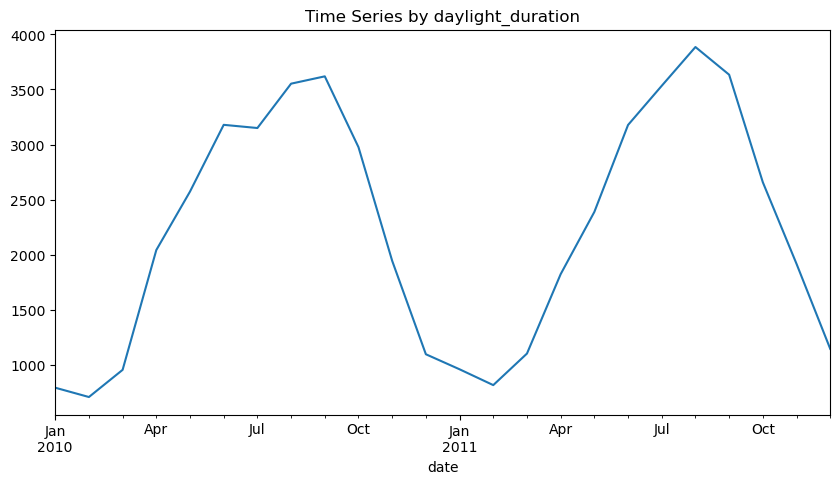

In [276]:
plt.figure(figsize=(10, 5))
all_daily_data.groupby(['date'])['daylight_duration'].sum().plot(title='Time Series by daylight_duration')

<Axes: title={'center': 'Time Series by sunshine_duration'}, xlabel='date'>

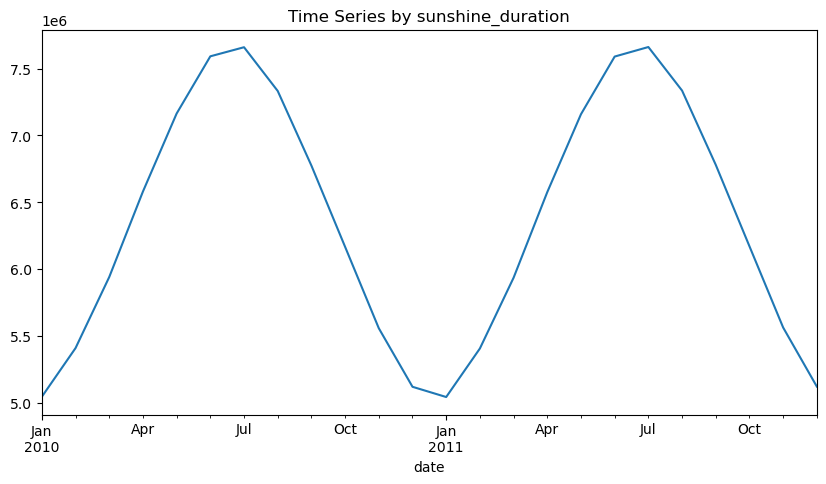

In [277]:
plt.figure(figsize=(10, 5))
all_daily_data.groupby(['date'])['sunshine_duration'].sum().plot(title='Time Series by sunshine_duration')

<Axes: title={'center': 'Time Series by rain_sum'}, xlabel='date'>

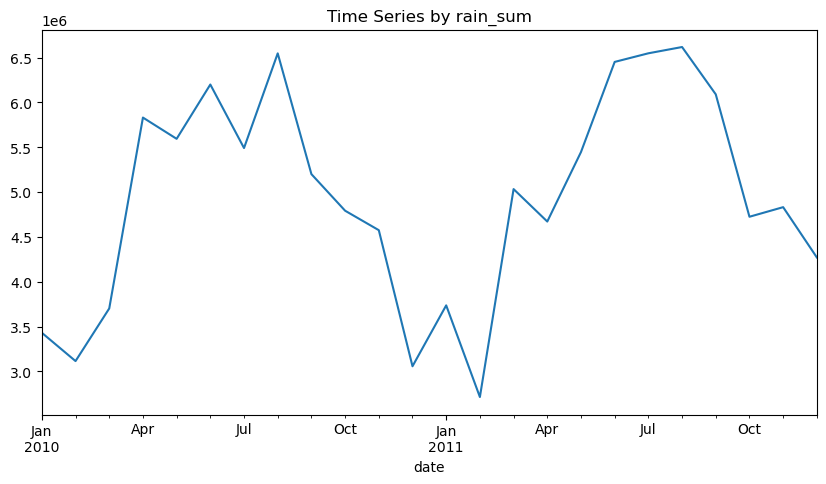

In [279]:
plt.figure(figsize=(10, 5))
all_daily_data.groupby(['date'])['rain_sum'].sum().plot(title='Time Series by rain_sum')

<Axes: title={'center': 'Time Series by snowfall_sum'}, xlabel='date'>

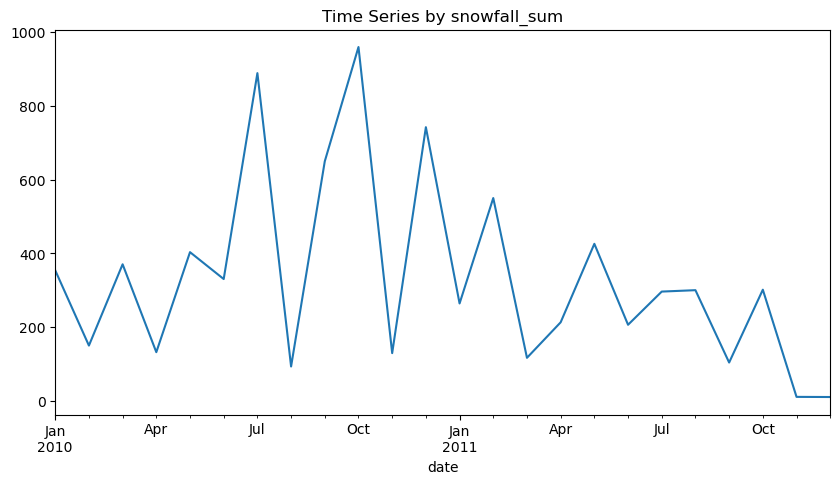

In [280]:
plt.figure(figsize=(10, 5))
all_daily_data.groupby(['date'])['snowfall_sum'].sum().plot(title='Time Series by snowfall_sum')

<Axes: title={'center': 'Time Series by Sales'}, xlabel='Date'>

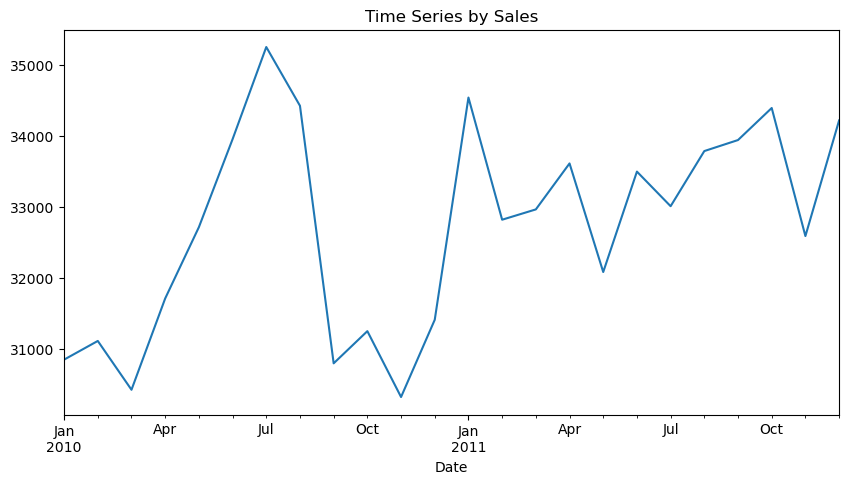

In [286]:
plt.figure(figsize=(10, 5))
merged_df.groupby(['Date'])['Sales'].sum().plot(title='Time Series by Sales')

# Answer
# How do weather conditions influence sales performance

In [ ]:

# When comparing our weather data line graphs for the locations with our sales timeseries, there seems to be a pattern and possible correlation visible for 2010
    # The sales plunges between mid of June and end of November, and staying at a relatively low level till december reaching a peak in January and decreasing again

# There are indications of correlation to the sunshine duration for our locations 
    # It also plunges from July 2010 to January 2010 and starts to go up in January again
# Similiar for our daylight duration 

# Also for rain sum we can see the drop over the summer month of 2010 which could indicates some degree of correlation in the year 2010 



# When looking at 2011, we can see that the sales values are much less volatile 
# daylight duration varies over time, but sales do not necessarily follows the same pattern.
# daylight duration is not a significant factor in determining sales

# while sunshine duration, daylight duration and rain sum have a similiar curve like in 2010, whcih speaks against a clear correlation 
    # Only exception might be Nvember with a drop, but on a much higher level in 2011 than in 2010

# Concatenate the dataframes

In [ ]:
# Concatenate the weather dataframe with my main dataframe data

In [165]:
all_daily_data.dtypes

date                  object
daylight_duration    float64
sunshine_duration    float64
rain_sum             float64
snowfall_sum         float64
latitude             float64
longitude            float64
dtype: object

In [168]:
merged_df = merged_df.rename(columns={'Date': 'date'})

In [169]:
merged_df.dtypes

Area Code                int64
State                   object
Market                  object
Market Size             object
Profit                 float64
Margin                 float64
Sales                  float64
COGS                   float64
Total Expenses         float64
Marketing              float64
Inventory              float64
Budget Profit          float64
Budget COGS            float64
Budget Margin          float64
Budget Sales           float64
ProductId                int64
date                    object
Product Type            object
Product                 object
Type                    object
Day                      int32
Week                    UInt32
Month                    int32
Year                     int32
Weekday                  int32
area_code_and_state     object
latitude               float64
longitude              float64
dtype: object

In [176]:
display(all_daily_data.head())
print(all_daily_data.shape)

,date,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,latitude,longitude
0,2010-04-01 00:00:00,11.231084,45718.156,42452.266,0.0,41.79,-72.26
1,2010-04-01 00:00:00,5.467583,46308.477,39650.918,3.7,48.47,-122.52
2,2010-04-01 00:00:00,11.828666,45172.110,41495.510,1.0,33.92,-118.39
3,2010-04-01 00:00:00,20.512001,45024.516,41358.400,0.0,31.46,-98.49
4,2010-04-01 00:00:00,7.172999,45658.496,42414.984,0.0,41.02,-72.15


(3480, 7)


In [288]:
merged_df.columns

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Date', 'Product Type', 'Product', 'Type', 'Day', 'Week',
       'Month', 'Year', 'Weekday', 'area_code_and_state', 'latitude',
       'longitude'],
      dtype='object')

In [178]:
display(merged_df.date)
print(merged_df.shape)

0       2010-04-01 00:00:00
1       2010-07-01 00:00:00
2       2010-11-01 00:00:00
3       2010-12-01 00:00:00
4       2011-07-01 00:00:00
               ...         
4213    2010-08-01 00:00:00
4214    2011-07-01 00:00:00
4215    2010-09-01 00:00:00
4216    2011-06-01 00:00:00
4217    2011-03-01 00:00:00
Name: date, Length: 4098, dtype: object

(4098, 28)


In [179]:
all_daily_data.date.unique()

array([Timestamp('2010-04-01 00:00:00'), Timestamp('2010-07-01 00:00:00'),
       Timestamp('2010-11-01 00:00:00'), Timestamp('2010-12-01 00:00:00'),
       Timestamp('2011-07-01 00:00:00'), Timestamp('2011-08-01 00:00:00'),
       Timestamp('2011-09-01 00:00:00'), Timestamp('2011-10-01 00:00:00'),
       Timestamp('2011-11-01 00:00:00'), Timestamp('2010-06-01 00:00:00'),
       Timestamp('2010-10-01 00:00:00'), Timestamp('2011-01-01 00:00:00'),
       Timestamp('2011-02-01 00:00:00'), Timestamp('2011-03-01 00:00:00'),
       Timestamp('2011-04-01 00:00:00'), Timestamp('2011-05-01 00:00:00'),
       Timestamp('2011-12-01 00:00:00'), Timestamp('2010-02-01 00:00:00'),
       Timestamp('2010-05-01 00:00:00'), Timestamp('2010-08-01 00:00:00'),
       Timestamp('2010-03-01 00:00:00'), Timestamp('2010-09-01 00:00:00'),
       Timestamp('2011-06-01 00:00:00'), Timestamp('2010-01-01 00:00:00')],
      dtype=object)

In [180]:
merged_df.date.unique()

array([Timestamp('2010-04-01 00:00:00'), Timestamp('2010-07-01 00:00:00'),
       Timestamp('2010-11-01 00:00:00'), Timestamp('2010-12-01 00:00:00'),
       Timestamp('2011-07-01 00:00:00'), Timestamp('2011-08-01 00:00:00'),
       Timestamp('2011-09-01 00:00:00'), Timestamp('2011-10-01 00:00:00'),
       Timestamp('2011-11-01 00:00:00'), Timestamp('2010-06-01 00:00:00'),
       Timestamp('2010-10-01 00:00:00'), Timestamp('2011-01-01 00:00:00'),
       Timestamp('2011-02-01 00:00:00'), Timestamp('2011-03-01 00:00:00'),
       Timestamp('2011-04-01 00:00:00'), Timestamp('2011-05-01 00:00:00'),
       Timestamp('2011-12-01 00:00:00'), Timestamp('2010-02-01 00:00:00'),
       Timestamp('2010-05-01 00:00:00'), Timestamp('2010-08-01 00:00:00'),
       Timestamp('2010-03-01 00:00:00'), Timestamp('2010-09-01 00:00:00'),
       Timestamp('2011-06-01 00:00:00'), Timestamp('2010-01-01 00:00:00')],
      dtype=object)

In [181]:
merged_df.latitude.unique()

array([41.82, 48.45, 33.95, 31.49, 41.02, 32.82, 27.54, 41.14, 41.91,
       41.7 , 30.01, 39.14, 29.  , 46.66, 30.47, 43.04, 32.73, 39.71,
       30.36, 42.02, 37.78, 41.11, 39.43, 40.79, 29.97, 41.59, 26.03,
       34.4 , 32.78, 39.15, 32.69, 42.32, 42.16, 42.34, 28.91, 47.4 ,
       32.5 , 30.43, 36.13, 30.04, 33.94, 29.44, 42.7 , 43.06, 38.58,
       41.37, 46.04, 32.11, 40.72, 38.85, 33.23, 41.74, 45.53, 30.97,
       35.17, 42.26, 47.04, 37.79, 30.4 , 40.65, 42.75, 40.75, 33.87,
       44.07, 33.68, 26.13, 41.63, 39.1 , 38.57, 35.54, 46.12, 33.72,
       40.83, 43.  , 41.4 , 42.31, 41.76, 32.81, 34.05, 41.89, 40.9 ,
       39.34, 40.67, 32.58, 38.79, 34.42, 33.84, 37.77, 39.79, 29.78,
       43.02, 44.84, 39.06, 38.91, 28.82, 28.75, 28.76, 42.27, 36.81,
       42.05, 32.2 , 37.49, 30.54, 41.78, 38.61, 30.64, 34.18, 30.27,
       33.06, 40.93, 39.78, 25.91, 42.3 , 34.41, 41.18, 37.8 , 42.8 ,
       32.54, 33.81, 34.01, 31.12, 43.01, 33.13, 33.33, 40.96, 26.02,
       28.59, 29.21,

In [182]:
all_daily_data.latitude.unique()

array([41.79, 48.47, 33.92, 31.46, 41.02, 32.79, 27.52, 41.16, 41.93,
       41.72, 29.98, 39.12, 29.  , 46.64, 30.47, 43.06, 32.72, 39.68,
       30.33, 42.  , 37.79, 41.09, 39.4 , 40.81, 41.58, 26.05, 34.41,
       42.36, 42.14, 28.93, 47.42, 32.51, 30.4 , 36.1 , 30.05, 29.42,
       42.71, 38.56, 41.37, 46.01, 32.09, 40.74, 38.84, 33.22, 45.52,
       30.97, 35.18, 42.28, 47.07, 40.67, 42.78, 33.85, 44.04, 33.71,
       26.12, 41.65, 35.54, 46.15, 42.99, 34.06, 41.86, 40.88, 39.33,
       32.58, 38.77, 39.82, 29.77, 44.82, 39.05, 38.91, 28.79, 28.72,
       36.8 , 42.07, 32.23, 37.5 , 30.54, 38.63, 30.62, 34.2 , 30.26,
       33.08, 40.95, 39.75, 25.91, 33.78, 33.99, 31.11, 33.15, 33.36,
       28.58, 29.21, 40.18, 29.56, 42.5 ])

In [ ]:
# With two decimals it cant find common latitude vlaues because of different rounding 

In [183]:
all_daily_data['latitude'] = all_daily_data['latitude'].round(decimals = 0)
all_daily_data['longitude'] = all_daily_data['longitude'].round(decimals = 0)

In [184]:
merged_df['latitude'] = merged_df['latitude'].round(decimals = 0)
merged_df['longitude'] = merged_df['longitude'].round(decimals = 0)

In [298]:
merged_df = merged_df.rename(columns={'Date': 'date'})

In [299]:
merged_df.columns

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'date', 'Product Type', 'Product', 'Type', 'Day', 'Week',
       'Month', 'Year', 'Weekday', 'area_code_and_state', 'latitude',
       'longitude'],
      dtype='object')

In [301]:
all_daily_data['date'] = pd.to_datetime(all_daily_data['date'])

In [303]:
all_daily_data["Day"] = all_daily_data["date"].dt.day
all_daily_data["Week"] = all_daily_data["date"].dt.isocalendar().week
all_daily_data["Month"] = all_daily_data["date"].dt.month

all_daily_data['Year'] = all_daily_data['date'].dt.year
all_daily_data['Weekday'] = all_daily_data['date'].dt.weekday

all_daily_data['date'] = all_daily_data['date'].astype('object')

In [314]:
Total_df_Test_Test_Test_Test = pd.merge(merged_df, all_daily_data, on=['latitude', 'longitude', 'Day', 'Week', 'Month', 'Year'], how='left', suffixes=('', '_all_daily'))
Total_df_Test_Test_Test_Test

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,...,Weekday,area_code_and_state,latitude,longitude,date_all_daily,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,Weekday_all_daily
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,3,203 Connecticut,41.82,-72.31,NaN,NaN,NaN,NaN,NaN,NaN
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,3,203 Connecticut,41.82,-72.31,NaN,NaN,NaN,NaN,NaN,NaN
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,...,0,203 Connecticut,41.82,-72.31,NaN,NaN,NaN,NaN,NaN,NaN
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,...,2,203 Connecticut,41.82,-72.31,NaN,NaN,NaN,NaN,NaN,NaN
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,...,4,203 Connecticut,41.82,-72.31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,979,Texas,South,Major Market,250.0,367.0,678.0,311.0,117.0,96.0,...,6,979 Texas,30.26,-97.70,NaN,NaN,NaN,NaN,NaN,NaN
4112,979,Texas,South,Major Market,155.0,152.0,254.0,104.0,37.0,29.0,...,4,979 Texas,30.26,-97.70,NaN,NaN,NaN,NaN,NaN,NaN
4113,979,Texas,South,Major Market,85.0,118.0,199.0,81.0,33.0,22.0,...,2,979 Texas,30.26,-97.70,NaN,NaN,NaN,NaN,NaN,NaN
4114,979,Texas,South,Major Market,28.0,55.0,92.0,38.0,33.0,12.0,...,2,979 Texas,30.26,-97.70,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
Total_df_Test_Test_Test_Test.shape

(4116, 34)

In [316]:
Total_df_Test_Test_Test_Test.isna().sum()

Area Code                 0
State                     0
Market                    0
Market Size               0
Profit                    0
Margin                    0
Sales                     0
COGS                      0
Total Expenses            0
Marketing                 0
Inventory                 0
Budget Profit             0
Budget COGS               0
Budget Margin             0
Budget Sales              0
ProductId                 0
date                      0
Product Type              0
Product                   0
Type                      0
Day                       0
Week                      0
Month                     0
Year                      0
Weekday                   0
area_code_and_state       0
latitude                  0
longitude                 0
date_all_daily         4034
daylight_duration      4034
sunshine_duration      4034
rain_sum               4034
snowfall_sum           4034
Weekday_all_daily      4034
dtype: int64

In [ ]:
# The concatenating does not work properly, ths might be caused by differences in the latitude and longitude values due to receiving the response from my weather API
# The API might have altered my input values for latitude and longitude, to approximations where it had weather values. 
# Concatenating is only possible for a few values

In [319]:
weather_data_rows = Total_df_Test_Test_Test_Test[
    Total_df_Test_Test_Test_Test['date_all_daily'].notna() &
    Total_df_Test_Test_Test_Test['daylight_duration'].notna() &
    Total_df_Test_Test_Test_Test['sunshine_duration'].notna() &
    Total_df_Test_Test_Test_Test['rain_sum'].notna() &
    Total_df_Test_Test_Test_Test['snowfall_sum'].notna() &
    Total_df_Test_Test_Test_Test['Weekday_all_daily'].notna() &
    Total_df_Test_Test_Test_Test['Day'].notna() &
    Total_df_Test_Test_Test_Test['Week'].notna() &
    Total_df_Test_Test_Test_Test['Month'].notna() &
    Total_df_Test_Test_Test_Test['Year'].notna() &
    Total_df_Test_Test_Test_Test['latitude'].notna() &
    Total_df_Test_Test_Test_Test['longitude'].notna()
]

print(weather_data_rows)

      Area Code       State Market   Market Size  Profit  Margin  Sales  \
1769        510  California   West  Major Market    83.0   110.0  194.0   
1770        510  California   West  Major Market    83.0   110.0  194.0   
1771        510  California   West  Major Market    83.0   110.0  194.0   
1772        510  California   West  Major Market    83.0   110.0  194.0   
1773        510  California   West  Major Market    70.0   101.0  179.0   
...         ...         ...    ...           ...     ...     ...    ...   
2232        580    Oklahoma  South  Small Market    30.0   145.0  266.0   
2233        580    Oklahoma  South  Small Market   128.0   195.0  336.0   
2234        580    Oklahoma  South  Small Market    82.0   134.0  230.0   
2235        580    Oklahoma  South  Small Market   104.0   120.0  220.0   
2236        580    Oklahoma  South  Small Market   145.0   155.0  285.0   

       COGS  Total Expenses  Marketing  ...  Weekday  area_code_and_state  \
1769   72.0           

In [ ]:
weather_data_rows 

# Data Cleaning of Total.df

In [ ]:
# I have to continiue only with my merged_df, without the weather data

In [320]:
Total_df = merged_df
Total_df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,...,Product,Type,Day,Week,Month,Year,Weekday,area_code_and_state,latitude,longitude
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,Columbian,Regular,1,13,4,2010,3,203 Connecticut,41.82,-72.31
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,Columbian,Regular,1,26,7,2010,3,203 Connecticut,41.82,-72.31
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,...,Columbian,Regular,1,44,11,2010,0,203 Connecticut,41.82,-72.31
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,...,Columbian,Regular,1,48,12,2010,2,203 Connecticut,41.82,-72.31
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,...,Columbian,Regular,1,26,7,2011,4,203 Connecticut,41.82,-72.31


In [321]:
# Snake Case
# Making column names small, replacing spaces, if existing

cols = []
for i in range(len(Total_df.columns)):
    cols.append(Total_df.columns[i].lower().replace(' ', '_'))
Total_df.columns = cols

In [322]:
Total_df.head()

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,...,product,type,day,week,month,year,weekday,area_code_and_state,latitude,longitude
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,Columbian,Regular,1,13,4,2010,3,203 Connecticut,41.82,-72.31
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,Columbian,Regular,1,26,7,2010,3,203 Connecticut,41.82,-72.31
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,...,Columbian,Regular,1,44,11,2010,0,203 Connecticut,41.82,-72.31
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,...,Columbian,Regular,1,48,12,2010,2,203 Connecticut,41.82,-72.31
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,...,Columbian,Regular,1,26,7,2011,4,203 Connecticut,41.82,-72.31


In [323]:
Total_df.isna().sum()

area_code              0
state                  0
market                 0
market_size            0
profit                 0
margin                 0
sales                  0
cogs                   0
total_expenses         0
marketing              0
inventory              0
budget_profit          0
budget_cogs            0
budget_margin          0
budget_sales           0
productid              0
date                   0
product_type           0
product                0
type                   0
day                    0
week                   0
month                  0
year                   0
weekday                0
area_code_and_state    0
latitude               0
longitude              0
dtype: int64

In [324]:
show_unique_values(Total_df)

Column: area_code
Unique Values: [203 206 209 210 212 213 214 216 217 224 225 234 239 253 254 262 281 303
 305 309 310 312 314 315 318 319 321 323 325 330 337 339 347 351 352 360
 361 386 405 407 408 409 413 414 415 417 419 425 430 432 435 440 469 475
 503 504 505 508 509 510 512 513 515 516 518 530 541 559 561 562 563 567
 573 580 585 603 607 608 614 617 618 619 626 630 631 636 641 646 650 660
 661 682 707 708 712 713 714 715 716 718 719 720 727 740 754 760 772 773
 774 775 781 786 801 805 806 813 815 816 817 818 830 831 832 845 847 850
 857 858 860 863 903 904 909 914 915 916 917 918 920 925 936 937 940 941
 949 951 954 956 959 970 971 972 978 979]


Column: state
Unique Values: ['Connecticut' 'Washington' 'California' 'Texas' 'New York' 'Ohio'
 'Illinois' 'Louisiana' 'Florida' 'Wisconsin' 'Colorado' 'Missouri' 'Iowa'
 'Massachusetts' 'Oklahoma' 'Utah' 'Oregon' 'New Mexico' 'New Hampshire'
 'Nevada']


Column: market
Unique Values: ['East' 'West' 'South' 'Central']


Column: market_s

In [ ]:
# There is no feature, where I could reduce the amount of unique values by building groups

# Preliminary exploratory analysis (Total dataframe)

In [ ]:
# Plot selected numerical columns

In [ ]:
# Split again into numerical_total and Categorical_total


In [325]:
categorical_Total_df = Total_df.select_dtypes(include=object)
numerical_Total_df = Total_df.select_dtypes(include=np.number)

In [326]:
# Check for duplicates
categorical_Total_df.duplicated().sum()
categorical_Total_df.duplicated().sum()

0

In [327]:
# Checking for outliers (numerical)

def outlier(Dataframe):
    for column in Dataframe.columns:
        sns.boxplot(x=Dataframe[column])
        plt.show()
    return None

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


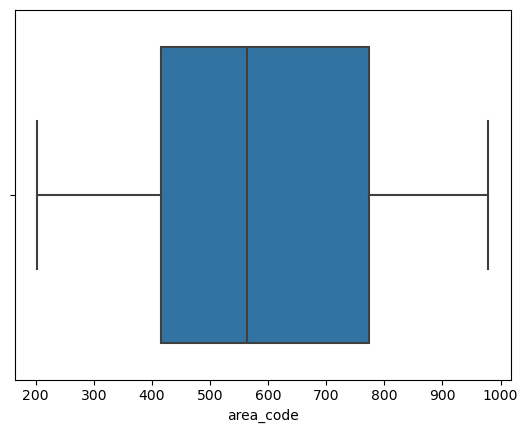

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


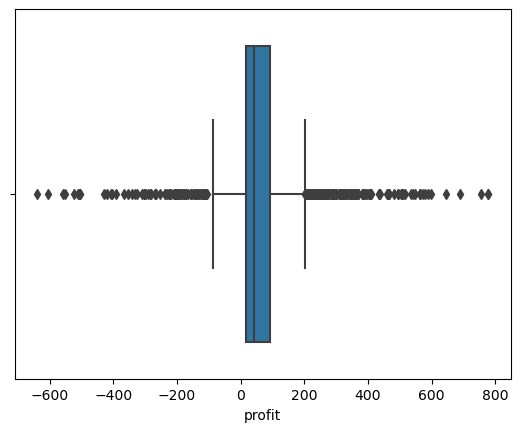

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


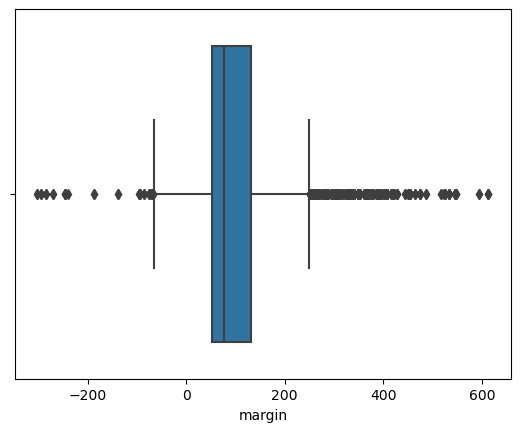

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


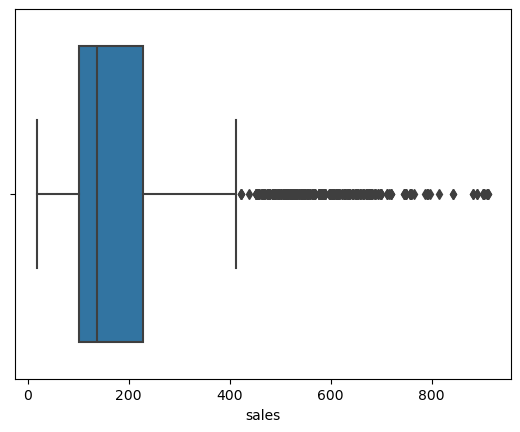

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


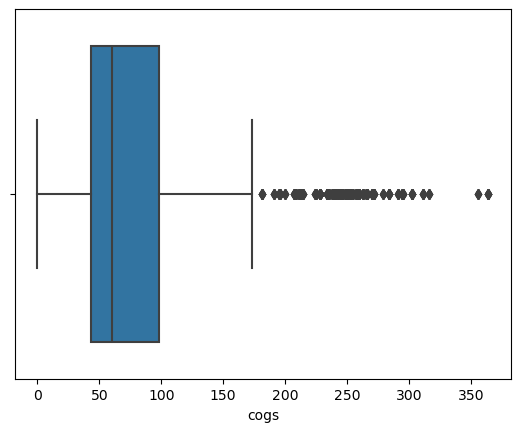

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


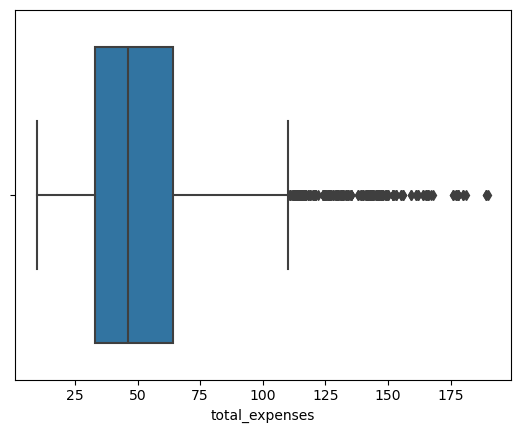

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


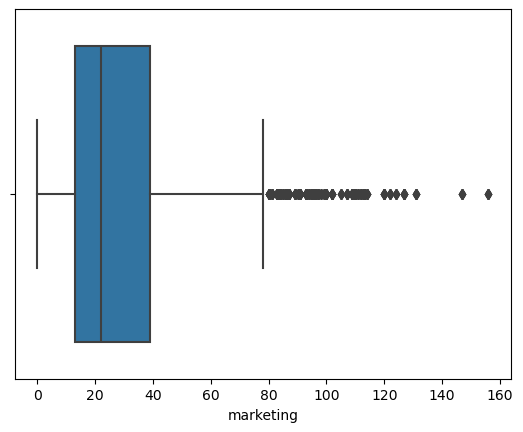

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


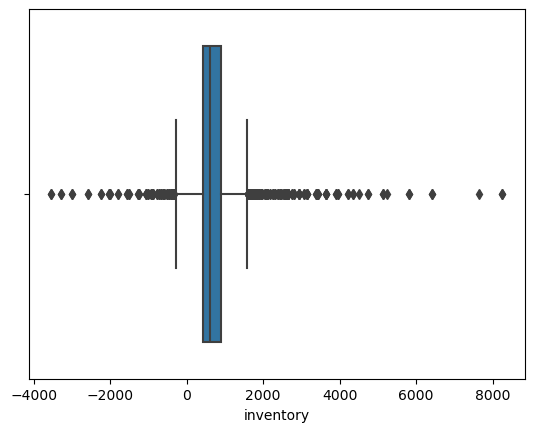

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


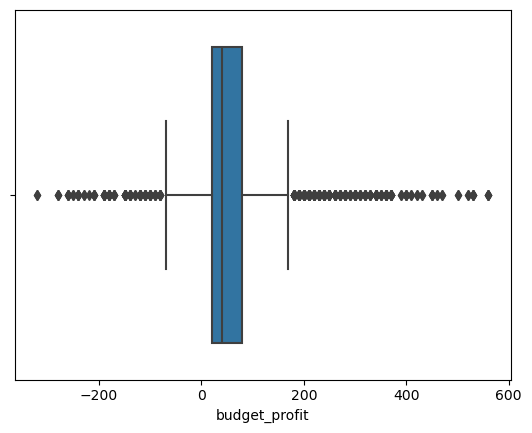

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


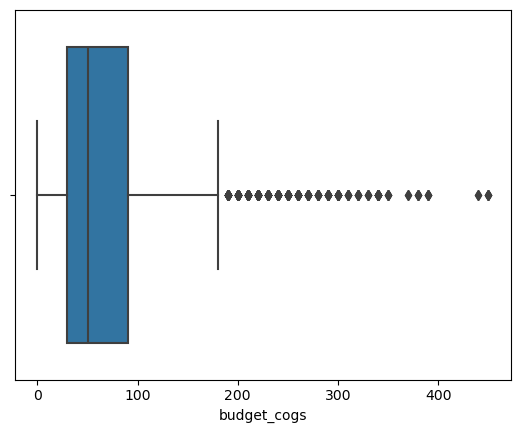

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


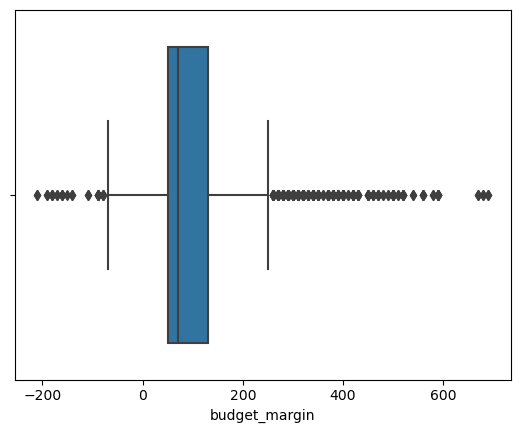

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


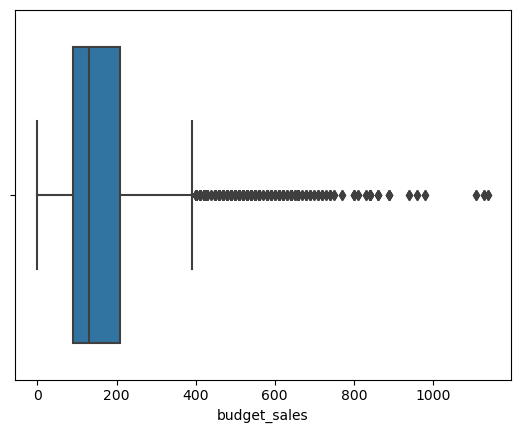

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


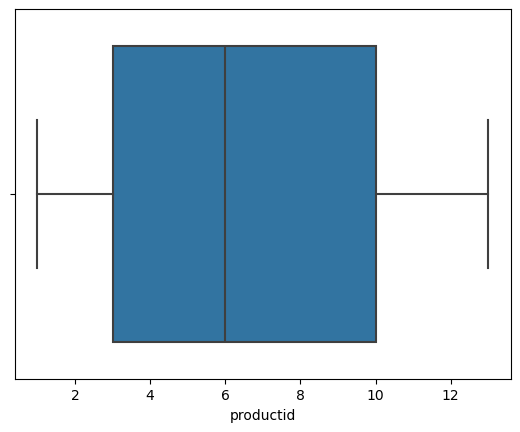

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


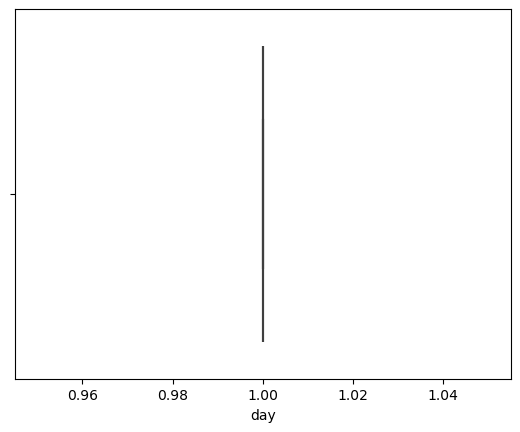

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


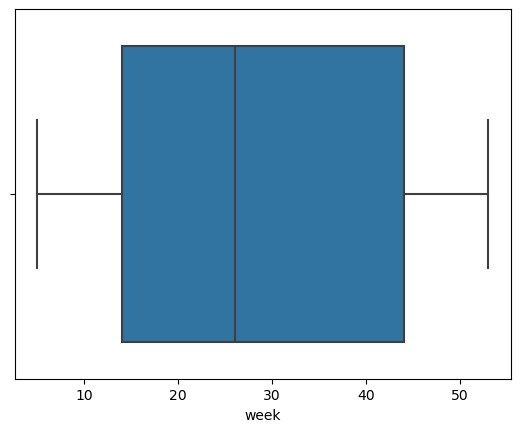

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


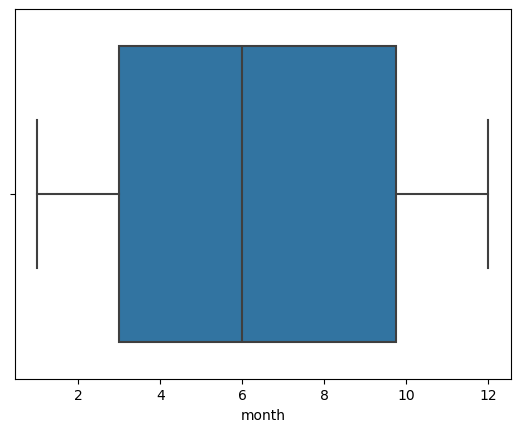

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


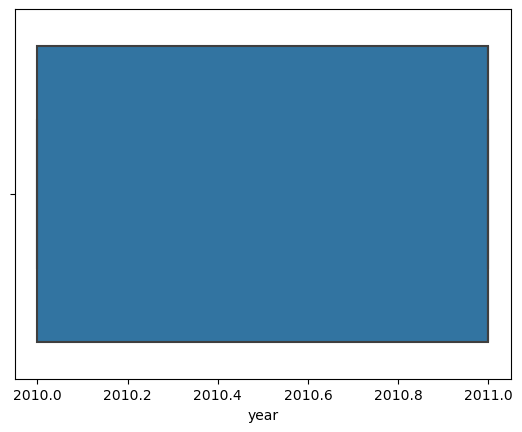

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


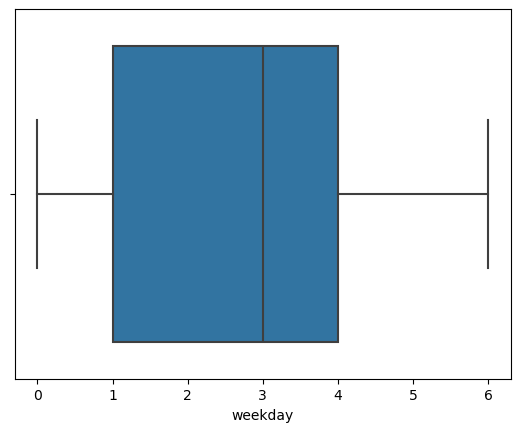

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


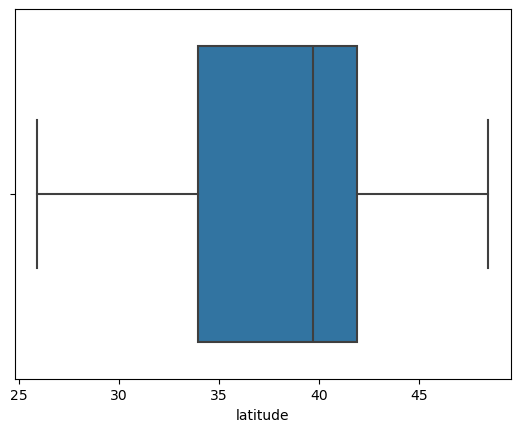

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


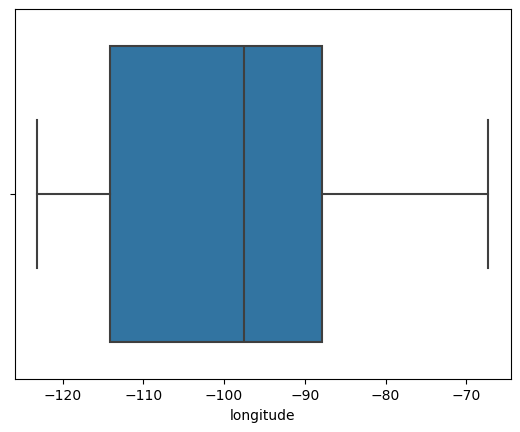

In [328]:
outlier(numerical_Total_df)

In [ ]:
# No clear single outliers that would have to be excluded, for features where it would make sense
# There are only many high and low values, no clear outliers

# Exploratory Data Analysis (EDA) total dataframe

In [329]:
numerical_Total_df.columns

Index(['area_code', 'profit', 'margin', 'sales', 'cogs', 'total_expenses',
       'marketing', 'inventory', 'budget_profit', 'budget_cogs',
       'budget_margin', 'budget_sales', 'productid', 'day', 'week', 'month',
       'year', 'weekday', 'latitude', 'longitude'],
      dtype='object')

In [330]:
Numerical_columns_to_plot = ['area_code', 'profit', 'margin', 'sales', 'cogs', 'total_expenses',
       'marketing', 'inventory', 'budget_profit', 'budget_cogs',
       'budget_margin', 'budget_sales', 'productid']

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


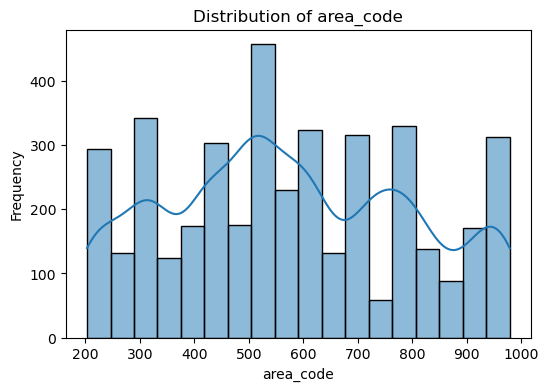

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


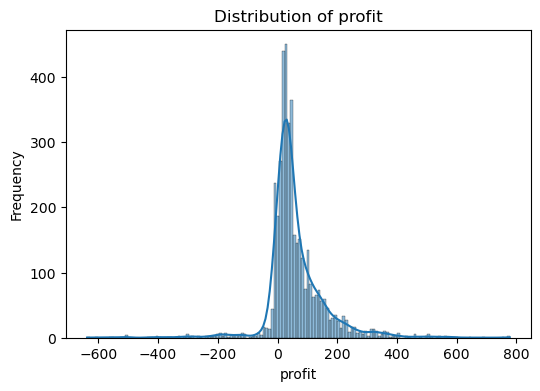

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


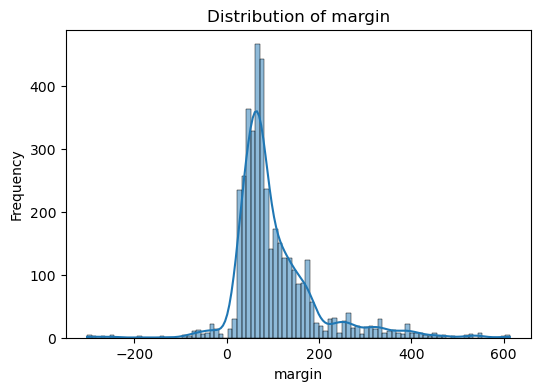

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


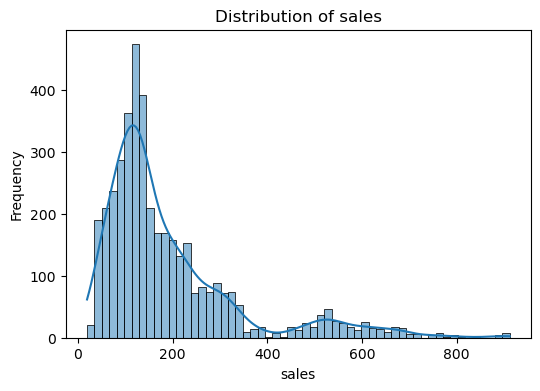

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


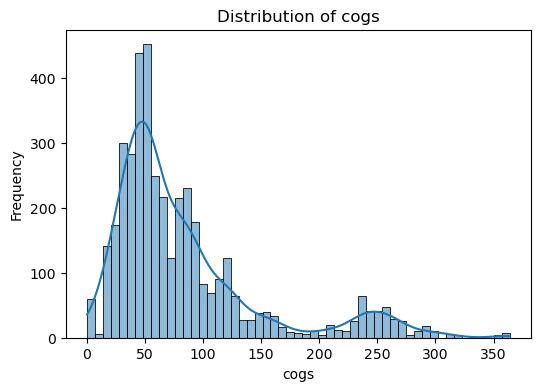

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


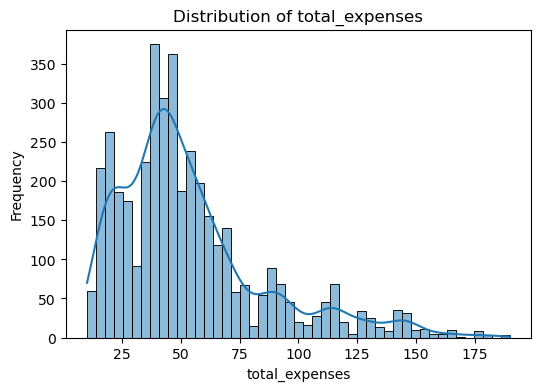

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


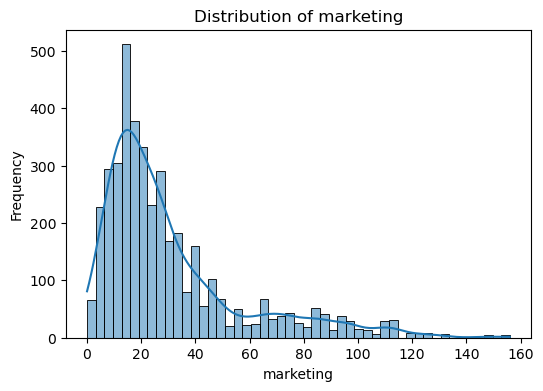

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


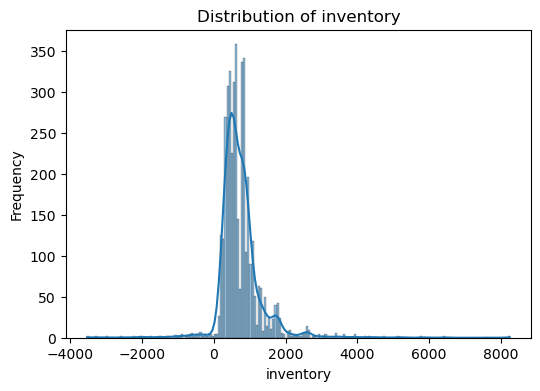

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


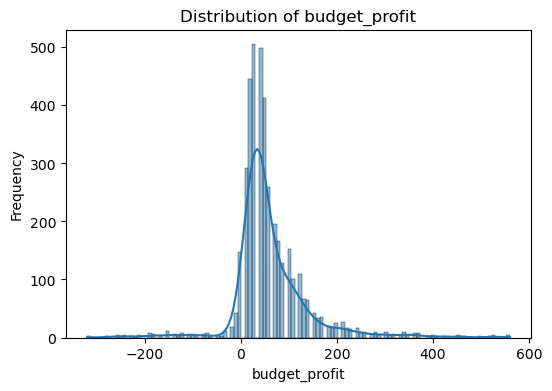

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


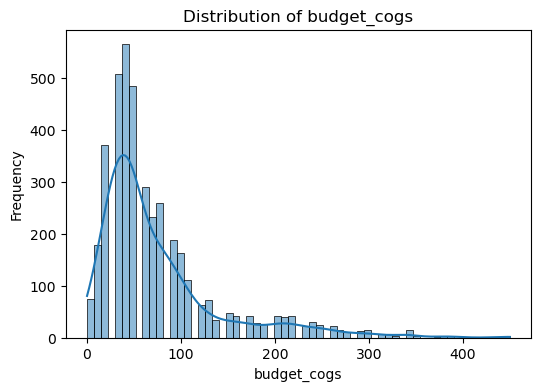

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


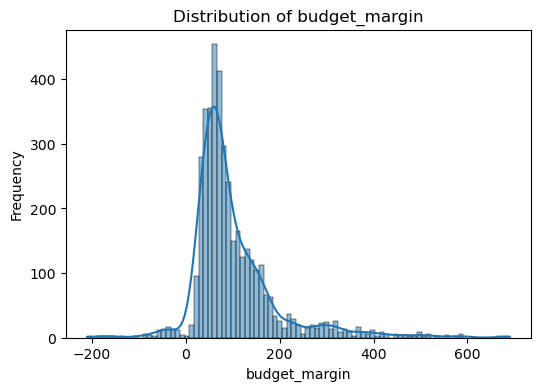

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


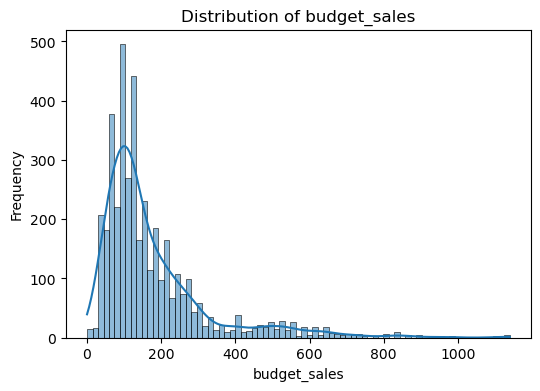

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


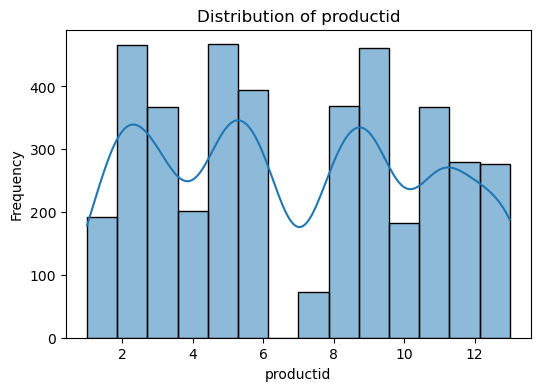

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_selected_numerical_variables(data, columns):
    for column in columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(data=data, x=column, kde=True)  # Change df to data
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

plot_selected_numerical_variables(numerical_Total_df, Numerical_columns_to_plot)

In [ ]:
# numerical plots:
    # Distributions characteristics 
    # All the distributions are right skewed (except product ID and area Code which are unique identifier)
    # There are similarities in the shape of the distribution of the single budgets but differences in the extreme values (min, max)
        # Lets look into the statistics of the numerical features

In [332]:
numerical_Total_df.describe()

,area_code,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_cogs,budget_margin,budget_sales,productid,day,week,month,year,weekday,latitude,longitude
count,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.0,4098.0,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000
mean,575.824061,61.496096,104.165691,191.730112,83.352123,53.513665,30.720595,737.172035,61.449488,74.470473,101.032211,175.502684,6.873597,1.0,28.420449,6.493411,2010.500976,2.705466,38.432177,-99.478536
std,221.459726,98.875758,91.840214,148.901969,65.821021,31.711722,26.429329,630.287584,78.799248,66.387853,92.163450,149.165128,3.668817,0.0,15.034048,3.454658,0.500060,1.903807,5.117199,16.345502
min,203.000000,-638.000000,-302.000000,19.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000,1.0,5.0,1.000000,2010.000000,0.000000,25.910000,-123.110000
25%,415.000000,17.000000,53.000000,102.000000,43.000000,33.000000,13.000000,428.000000,20.000000,30.000000,50.000000,90.000000,3.000000,1.0,14.0,3.000000,2010.000000,1.000000,33.940000,-114.090000
50%,563.000000,41.000000,76.000000,138.000000,60.000000,46.000000,22.000000,617.000000,40.000000,50.000000,70.000000,130.000000,6.000000,1.0,26.0,6.000000,2011.000000,3.000000,39.710000,-97.510000
75%,773.000000,91.000000,132.000000,228.000000,98.000000,64.000000,39.000000,894.000000,80.000000,90.000000,130.000000,210.000000,10.000000,1.0,44.0,9.750000,2011.000000,4.000000,41.890000,-87.840000
max,979.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000,1.0,53.0,12.000000,2011.000000,6.000000,48.450000,-67.270000


profit:

Mean: $575.82
Standard Deviation: $221.46
Minimum: -$638.00
25th Percentile: $17.00
Median (50th Percentile): $41.00
75th Percentile: $91.00
M $778asales:



margin:
Mean: 61.50%
Standard Deviation: 98.88%
Minimum: -302.00%
25th Percentile: 17.00%
Median: 41.00%
75th Percentile: 91.00%
Maximum: 778.00%

Target:

sales:
Mean: $191.73
Standard Deviation: $148.90
Minimum: $19.00
25th Percentile: $53.00
Median: $76.00
75th Percentile: $132.00
Maximum: $912.00



cogs (Cost of Goods Sold):
Mean: $83.35
Standard Deviation: $65.82
Minimum: $0.00
25th Percentile: $43.00
Median: $60.00
75th Percentile: $98.00
Maximum: $364.00



total_expenses:
Mean: $53.51
Standard Deviation: $31.71
Minimum: $10.00
25th Percentile: $33.00
Median: $46.00
75th Percentile: $64.00
Maximum: $190.00



marketing:
Mean: $30.72
Standard Deviation: $26.43
Minimum: $0.00
25th Percentile: $13.00
Median: $22.00
75th Percentile: $39.00
Maximum: $156.00



inventory:
Mean: 737.17
Standard Deviation: 630.29
Minimum: -3534.00
25th Percentile: 428.00
Median: 617.00
75th Percentile: 894.00
Maximum: 8252.00




budget_profit:
Mean: $61.45
Standard Deviation: $78.80
Minimum: -$320.00
25th Percentile: $20.00
Median: $40.00
75th Percentile: $80.00
Maximum: $560.00



budget_cogs:
Mean: $74.47
Standard Deviation: $66.39
Minimum: $0.00
25th Percentile: $30.00
Median: $50.00
75th Percentile: $90.00
Maximum: $450.00



budget_margin:
Mean: 101.03%
Standard Deviation: 92.16%
Minimum: -210.00%
25th Percentile: 50.00%
Median: 70.00%
75th Percentile: 130.00%
Maximum: 690.00%


budget_sales:
Mean: $175.50
Standard Deviation: $149.17
Minimum: $0.00
25th Percentile: $90.00
Median: $130.00
75th Percentile: $210.00
Maximum: $1140.00

In [ ]:
# the big bomb of Visual Data Analysis
sns.pairplot(numerical_Total_df)

In [335]:
Total_df.columns

Index(['area_code', 'state', 'market', 'market_size', 'profit', 'margin',
       'sales', 'cogs', 'total_expenses', 'marketing', 'inventory',
       'budget_profit', 'budget_cogs', 'budget_margin', 'budget_sales',
       'productid', 'date', 'product_type', 'product', 'type', 'day', 'week',
       'month', 'year', 'weekday', 'area_code_and_state', 'latitude',
       'longitude'],
      dtype='object')

In [336]:
categorical_Total_df.columns
# Countplots


Index(['state', 'market', 'market_size', 'date', 'product_type', 'product',
       'type', 'area_code_and_state'],
      dtype='object')

In [338]:
numerical_Total_df.columns
# Scatterplots timeseries

Index(['area_code', 'profit', 'margin', 'sales', 'cogs', 'total_expenses',
       'marketing', 'inventory', 'budget_profit', 'budget_cogs',
       'budget_margin', 'budget_sales', 'productid', 'day', 'week', 'month',
       'year', 'weekday', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html

# Question to answer
# How do geographical location and market factors influence sales performance

In [347]:
# Relationship between target and numerical values

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


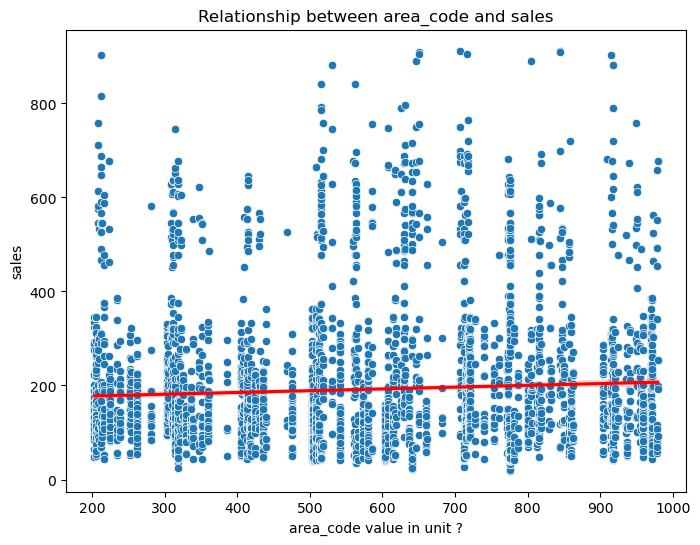

In [333]:
# Add Scatterplots to show correlations 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=Total_df, x='area_code', y='sales')

# Adds a regression line to the plot
sns.regplot(data=Total_df, x='area_code', y='sales', scatter=False, color='red')

plt.title('Relationship between area_code and sales')
plt.xlabel('area_code value in unit ?')
plt.ylabel('sales')
plt.show()

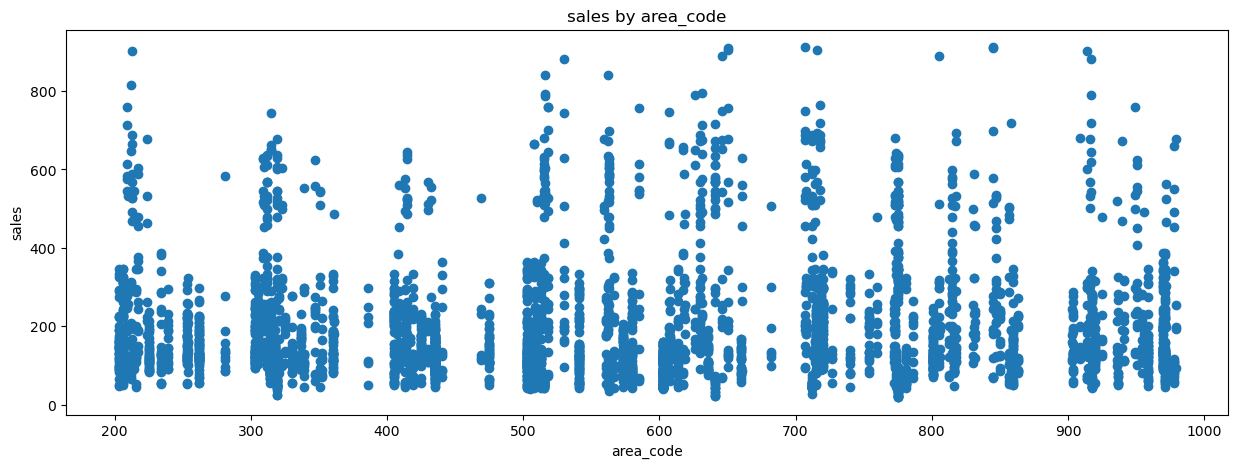

In [369]:
x = Total_df['area_code']
y = Total_df['sales']
plt.figure(figsize=(15,5))
plt.title('sales by area_code')
plt.xlabel('area_code')
plt.ylabel('sales')
plt.scatter(x,y)
plt.show()

In [370]:
# When chosing area Code as location, no clear correlation between sales_by_by_area Code visible

In [ ]:
# there is no clear correlation between area code and sales. The data points are spread out randomly, with no obvious pattern.
# This suggests that sales are not significantly influenced by area code.

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


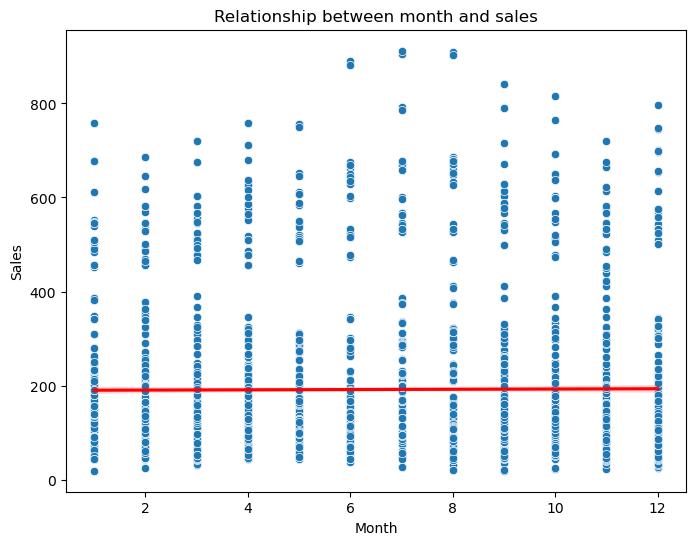

In [346]:
# Add Scatterplot to show correlations

plt.figure(figsize=(8, 6))
sns.scatterplot(data=Total_df, x='month', y='sales')

# Adds a regression line to the plot
sns.regplot(data=Total_df, x='month', y='sales', scatter=False, color='red')

plt.title('Relationship between month and sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Slightly higher sales max sales vlaues for the months 6,7,8 
# No clear seasonal pattern visible when looking at the data from both years 2010 and 2011

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Total_df, x='month', y='sales')

# Adds a regression line to the plot
sns.regplot(data=Total_df, x='month', y='sales', scatter=False, color='red')

plt.title('Relationship between month and sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='profit', ylabel='sales'>

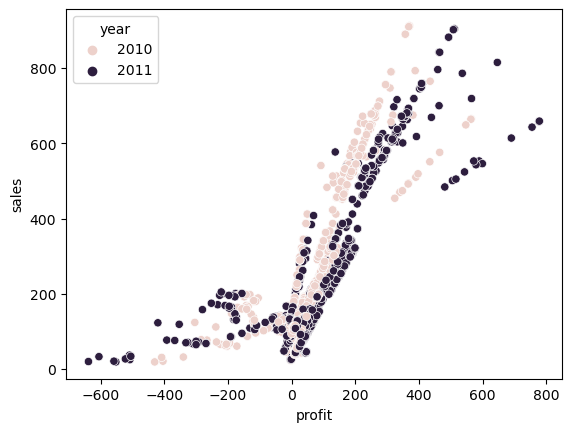

In [342]:
sns.scatterplot(data=Total_df, x="profit", y="sales", hue="year")

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='margin', ylabel='sales'>

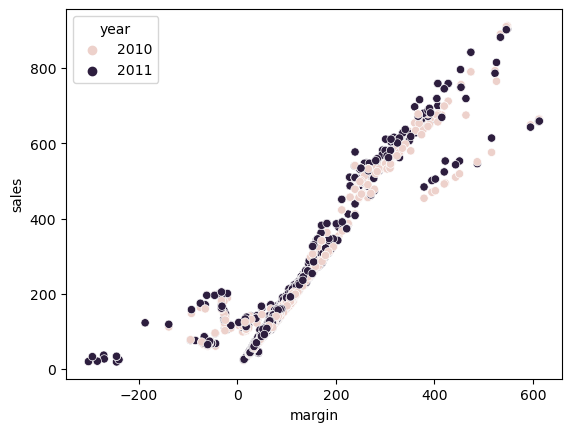

In [343]:
sns.scatterplot(data=Total_df, x="margin", y="sales", hue="year")

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='cogs', ylabel='sales'>

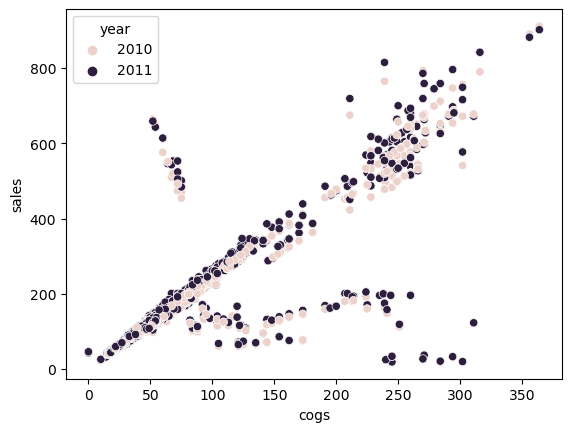

In [349]:
sns.scatterplot(data=Total_df, x="cogs", y="sales", hue="year")

In [ ]:
sns.scatterplot(data=Total_df, x="margin", y="cogs", hue="year")

In [350]:
categorical_Total_df.columns # Countplots

Index(['state', 'market', 'market_size', 'date', 'product_type', 'product',
       'type', 'area_code_and_state'],
      dtype='object')

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='product', ylabel='count'>

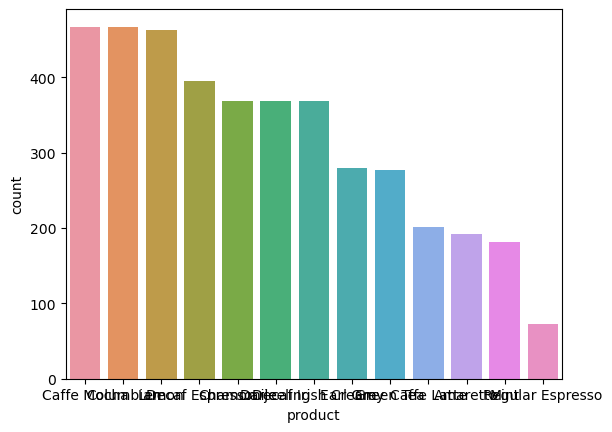

In [363]:
# Show countplot in descending order for Procucts
# I found following source https://stackoverflow.com/questions/46623583/order-categories-by-count-in-a-seaborn-countplot

sns.countplot(x = 'product',
              data = Total_df,
              order = Total_df['product'].value_counts().index)

In [ ]:
sns.countplot(x = 'product_type',
              data = Total_df,
              order = Total_df['product_type'].value_counts().index)

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


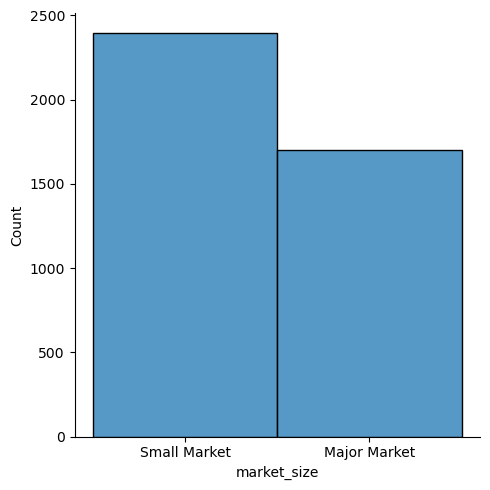

In [351]:
sns.displot(Total_df['market_size'])
plt.show()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='market_size', ylabel='sales'>

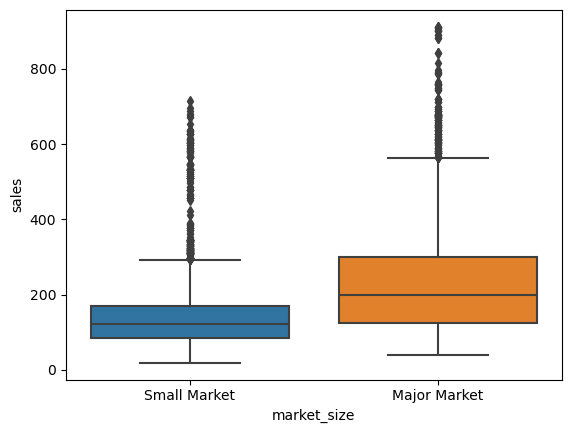

In [352]:
#Boxplots
#Looking at the relationship between Market size and Sales:
sns.boxplot(data=Total_df, x="market_size", y="sales")

In [353]:
Total_df['market_size'].value_counts()

market_size
Small Market    2394
Major Market    1704
Name: count, dtype: int64

In [354]:
# Small abd Major Markets
    # Major markets have a significantly higher median sales value

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='market', ylabel='count'>

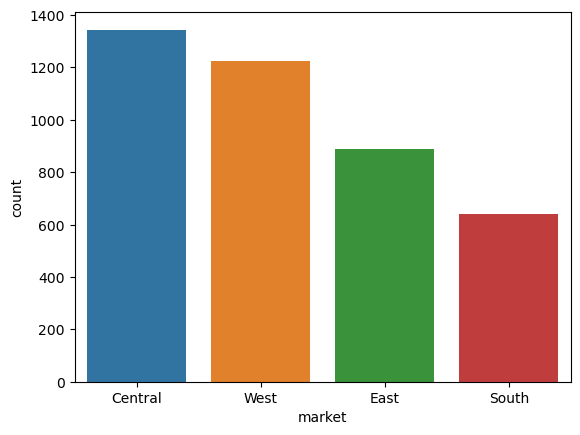

In [372]:
sns.countplot(x = 'market',
              data = Total_df,
              order = Total_df['market'].value_counts().index)

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='market', ylabel='sales'>

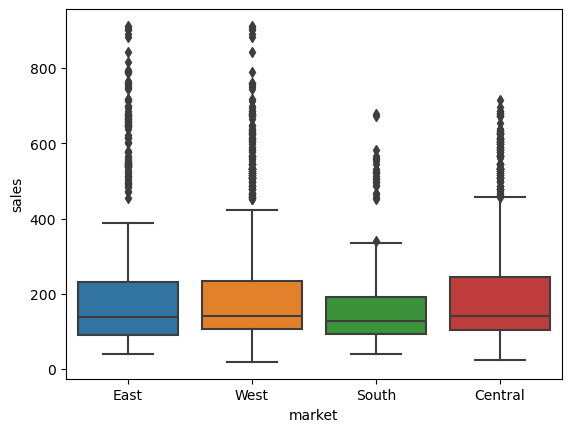

In [356]:
#Boxplots
#Looking at the relationship between Market and Sales:
sns.boxplot(data=Total_df, x="market", y="sales")

In [ ]:
# east, west and central market have equal median sales
# South market has a slightly lower median sales vlaue
# The highest sales are achieved in the east and west market

In [ ]:
# The box and whisker plot does not show a clear correlation between market and sales.
# The boxes for each market overlap significantly, meaning that the distributions of sales values are similar across markets.
# Additionally, the median sales values for each market are relatively close together.

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-package

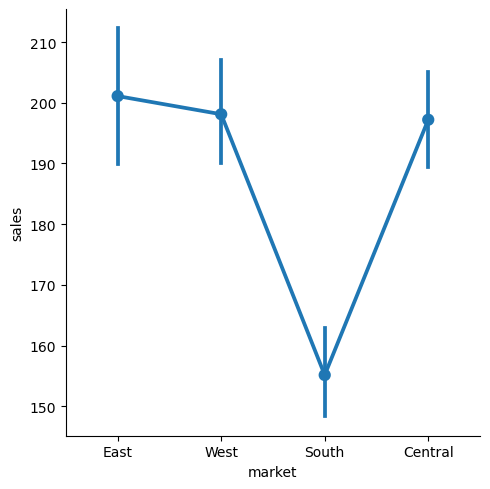

In [378]:
# Create a Catplot (pointplot) to show the relationship between sales and market
sns.catplot(x='market', y='sales', data=Total_df, kind='point')

# Show the plot
plt.show()

In [357]:
# Looking into the state column

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='state', ylabel='sales'>

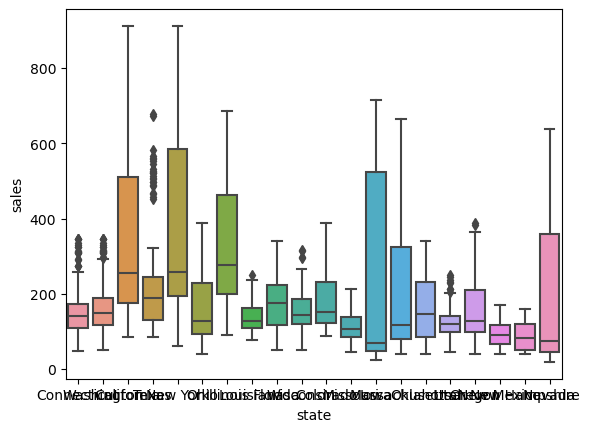

In [379]:
#Boxplots
#Looking at the relationship between Market and Sales:
sns.boxplot(data=Total_df, x="state", y="sales")

In [ ]:
# There is no clear relationship between states and sales. 
# The data points are spread out randomly, with no obvious pattern. 
# This suggests that sales are not significantly influenced by state.

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-package

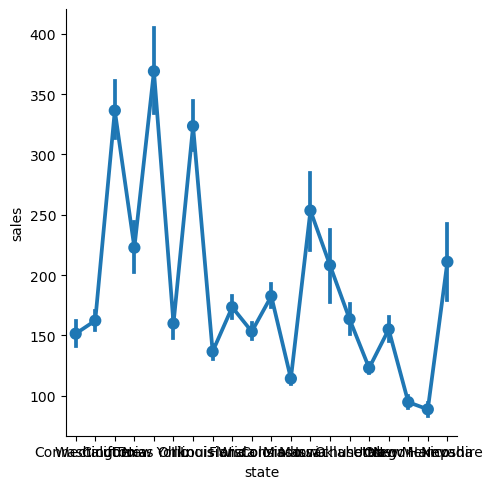

In [377]:
# Create a Catplot (pointplot) to show the relationship between sales and states
sns.catplot(x='state', y='sales', data=Total_df, kind='point')

# Show the plot
plt.show()

In [358]:
Total_df['state'].nunique()

20

In [359]:
# The stores distribution is not equal over the different states
Total_df['state'].value_counts()

state
Utah             288
California       288
Colorado         264
Oregon           264
Washington       240
Ohio             216
Illinois         216
Florida          216
Wisconsin        216
Missouri         216
Iowa             216
New York         192
New Hampshire    168
New Mexico       168
Connecticut      168
Oklahoma         168
Texas            168
Massachusetts    144
Nevada           144
Louisiana        138
Name: count, dtype: int64

In [360]:
# Looking into the market column

In [361]:
# There are 4 different markets ['East' 'West' 'South' 'Central']
Total_df['market'].nunique()

4

In [362]:
# The distribution between the markets is not equal 
# East an south are underrepresented in the amount of markets observed in this area
Total_df['market'].value_counts()

market
Central    1344
West       1224
East        888
South       642
Name: count, dtype: int64

# Answer to question
# How do geographical location and market factors influence sales performance

In [ ]:
# there is no clear correlation between area code and sales. The data points are spread out randomly, with no obvious pattern.
# This suggests that sales are not significantly influenced by area code.

In [ ]:
# The box and whisker plot does not show a clear correlation between market and sales.
# The boxes for each market overlap significantly, meaning that the distributions of sales values are similar across markets.
# Additionally, the median sales values for each market are relatively close together.

In [ ]:
# There is no clear relationship between states and sales. 
# The data points are spread out randomly, with no obvious pattern. 
# This suggests that sales are not significantly influenced by state.

In [364]:
correlation_matrix = numerical_Total_df.corr()
correlation_matrix

,area_code,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_cogs,budget_margin,budget_sales,productid,day,week,month,year,weekday,latitude,longitude
area_code,1.000000,0.018981,0.032629,0.056277,0.079361,0.038779,0.045832,0.068583,0.018696,0.066171,0.027489,0.046434,0.026062,NaN,-0.013036,0.011865,-0.010641,-0.035756,-0.206145,-0.027366
profit,0.018981,1.000000,0.918541,0.804631,0.497657,0.218905,0.248046,-0.047053,0.938007,0.499778,0.877370,0.764526,-0.064001,NaN,-0.001716,0.004903,0.109618,0.025927,0.017976,0.090933
margin,0.032629,0.918541,1.000000,0.945017,0.710093,0.543429,0.556759,0.106557,0.924279,0.700744,0.966014,0.908739,-0.096581,NaN,-0.007789,0.007778,-0.005332,0.015339,0.025303,0.092346
sales,0.056277,0.804631,0.945017,1.000000,0.897698,0.693719,0.717593,0.350401,0.823910,0.869467,0.926014,0.959116,-0.079166,NaN,0.002809,0.006571,0.025710,0.022067,0.017835,0.084138
cogs,0.079361,0.497657,0.710093,0.897698,1.000000,0.776718,0.815301,0.621194,0.547193,0.952594,0.714826,0.865628,-0.043576,NaN,-0.003157,0.012573,0.002485,0.016089,0.004342,0.059360
total_expenses,0.038779,0.218905,0.543429,0.693719,0.776718,1.000000,0.964717,0.427378,0.276830,0.742890,0.548021,0.669234,-0.113623,NaN,0.006819,0.002215,-0.017478,0.011979,0.027670,0.030870
marketing,0.045832,0.248046,0.556759,0.717593,0.815301,0.964717,1.000000,0.495709,0.303653,0.775320,0.563126,0.693000,-0.083141,NaN,-0.005556,0.009645,-0.000376,0.011345,0.019640,0.054855
inventory,0.068583,-0.047053,0.106557,0.350401,0.621194,0.427378,0.495709,1.000000,0.022771,0.594082,0.158283,0.362201,0.031287,NaN,0.058785,0.095720,0.005445,0.006425,0.031887,0.014266
budget_profit,0.018696,0.938007,0.924279,0.823910,0.547193,0.276830,0.303653,0.022771,1.000000,0.597977,0.950204,0.853232,-0.154384,NaN,-0.011572,0.004608,-0.005611,0.031433,0.019613,0.096728
budget_cogs,0.066171,0.499778,0.700744,0.869467,0.952594,0.742890,0.775320,0.594082,0.597977,1.000000,0.763973,0.917093,-0.189204,NaN,-0.006745,0.006088,-0.000426,0.005863,-0.007609,0.056438


In [ ]:
# Plots to look at highest multi-collinearity Always high correlation pair after each other

In [365]:
col_viz = ['profit', 'budget_profit', 'margin', 'budget_margin', 'sales', 'budget_sales', 'cogs', 'budget_cogs', 'total_expenses', 'marketing']

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


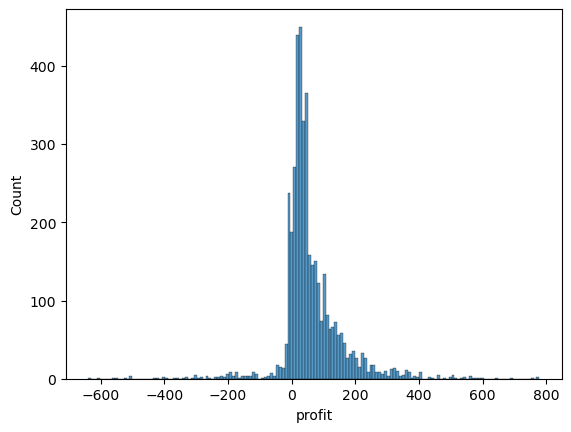

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


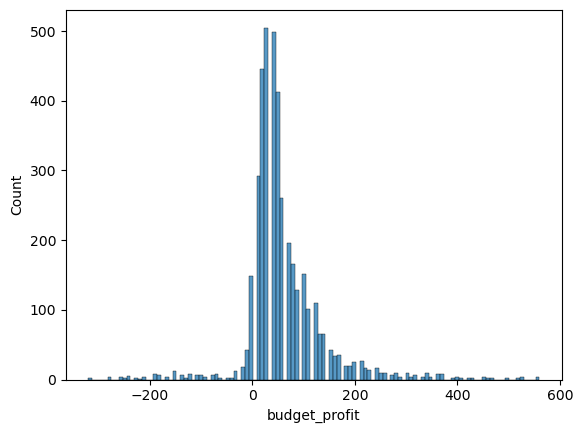

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


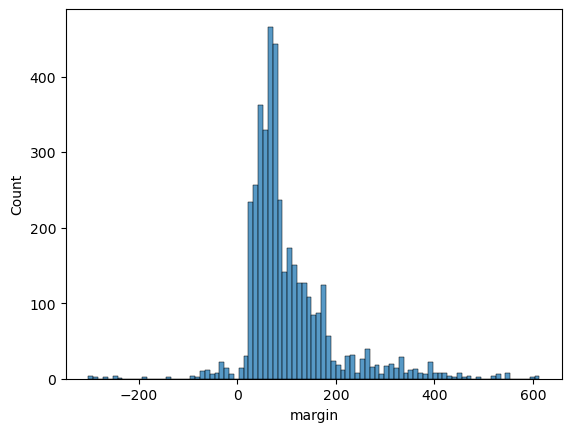

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


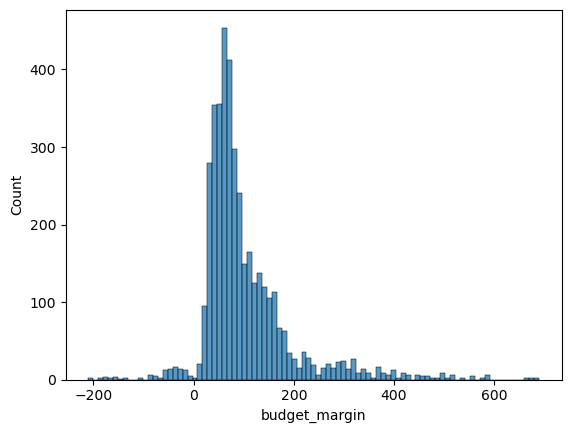

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


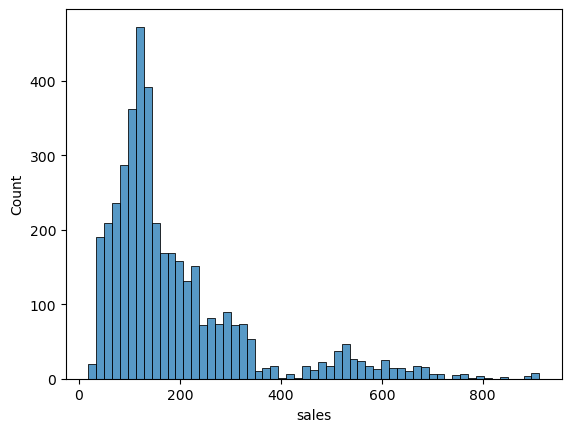

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


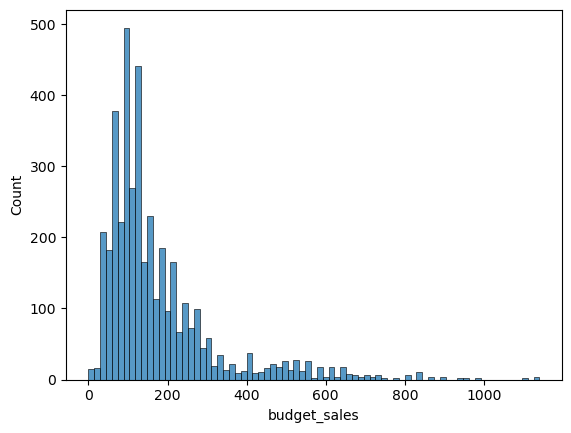

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


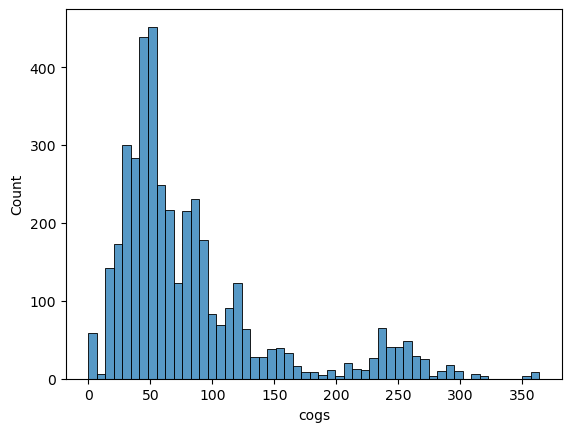

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


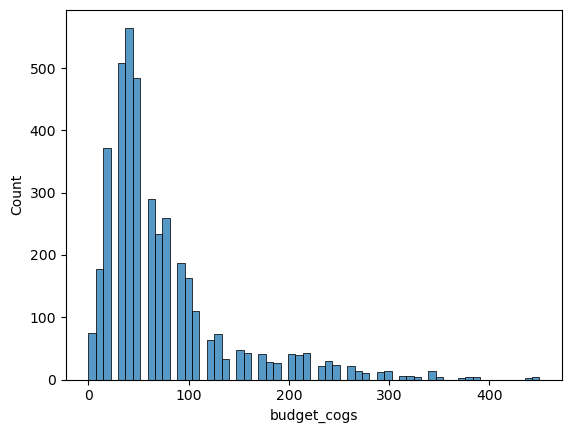

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


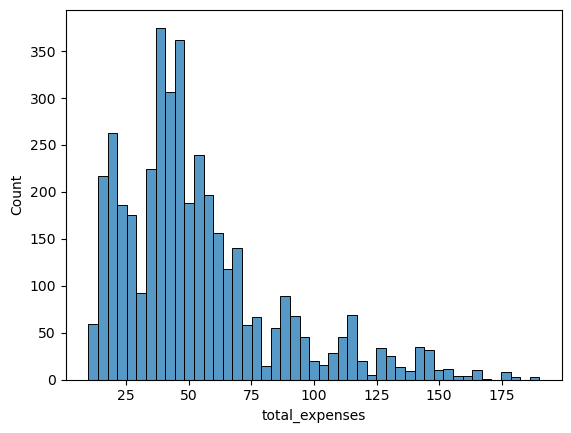

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


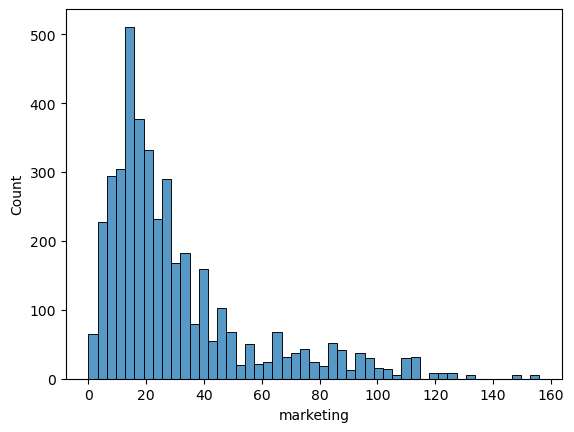

In [366]:
for column in numerical_Total_df[col_viz]:
    sns.histplot( x=numerical_Total_df[column])
    plt.show()

C:\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


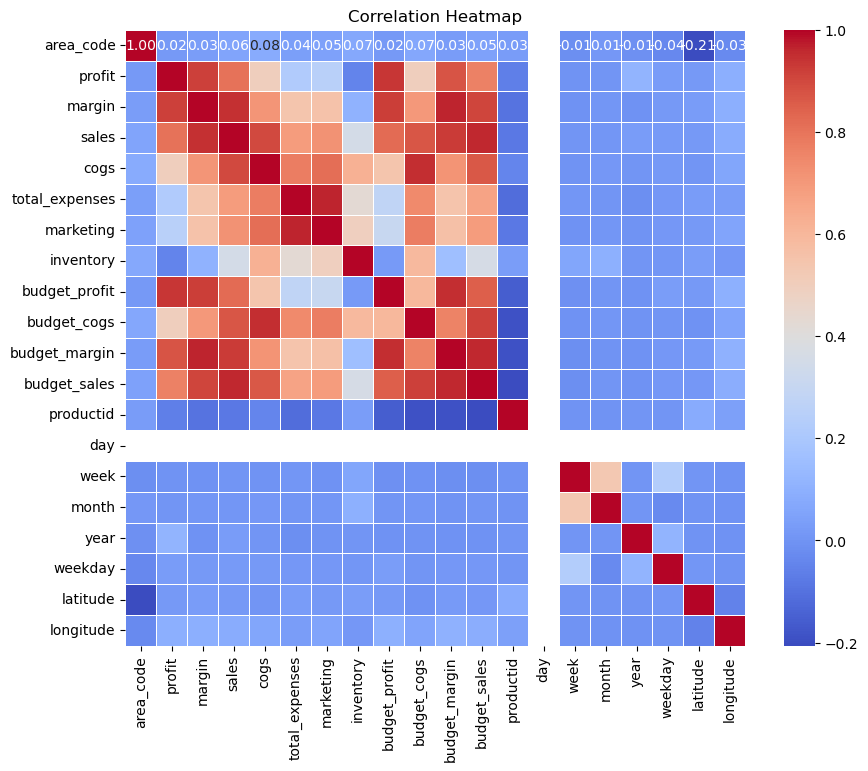

In [367]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Model building

In [ ]:
categorical_Total_df.columns

In [ ]:
numerical_Total_df.columns

In [ ]:
# First drop the features you were planning to drop after analysing the main dataset and Total_df
    # newly created columns drop area_code_and_state
    # day, week drop information redundant with date feature?
    # 'latitude', 'longitude' can be dropped, sonce they only have a meaning as combination
    # day has no appraent influence on any other vlaue 

In [ ]:
columns_to_drop_categorical = ['product_type', 'type', 'market_size', 'area_code_and_state', 'date']

In [ ]:
columns_to_drop_numerical = ['profit', 'margin', 'budget_margin', 'budget_sales', 'marketing', 'latitude', 'longitude', 'day']

In [ ]:
categorical_Total_df = categorical_Total_df.drop(columns=columns_to_drop_categorical)

In [ ]:
print(categorical_Total_df.head())

In [ ]:
numerical_Total_df = numerical_Total_df.drop(columns=columns_to_drop_numerical)

In [ ]:
print(numerical_Total_df.head())

In [ ]:
# Concatenate categorical_Total_df and numerical_Total_df to Total_df

In [ ]:
Total_df = pd.concat([numerical_Total_df, categorical_Total_df], axis=1)

In [ ]:
Total_df.head(1)

In [ ]:
print(Total_df.shape)

In [ ]:
Total_df.info()

In [ ]:
cols_to_scale = ['area_code', 'cogs', 'total_expenses', 'inventory', 'budget_profit', 'budget_cogs', 'productid', 'week', 'month', 'year', 'weekday']
cols_one_hot_encode = ['state', 'market', 'product']

In [ ]:
#Data transformation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

## Predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#splitting X and Y
X = Total_df.drop(['sales'],axis=1)
y = Total_df['sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Creating X_train_num & X_test_num
X_train_num = X_train[cols_to_scale]

In [ ]:
X_test_num = X_test[cols_to_scale]

In [ ]:
#Scaling X_train_num
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_train_num)
x_standardized = MinMaxtransformer.transform(X_train_num)
print(x_standardized.shape)
X_train_num_s = pd.DataFrame(x_standardized, columns=X_train_num.columns)
X_train_num_s

In [ ]:
#Using trained scaler to scale X_test_num
x_standardized = MinMaxtransformer.transform(X_test_num)
print(x_standardized.shape)
X_test_num_s = pd.DataFrame(x_standardized, columns=X_test_num.columns)
X_test_num_s

In [ ]:
# Chosing the categorical columns I want to chose for One hot encoding, too many unique values are not suitable for it!

In [ ]:
X_train_cat = X_train[cols_one_hot_encode].astype(object)
X_test_cat = X_test[cols_one_hot_encode].astype(object)

In [ ]:
# I could verify the order of One hot Encoding, to reduce overfitting 4.05

In [ ]:
#One-hot encoding X_train_cat
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
encoded = encoder.transform(X_train_cat).toarray()
X_train_cat_onehot_encoded = pd.DataFrame(encoded, columns=cols)
X_train_cat_onehot_encoded

In [ ]:
#One-hot encoding X_test_cat
encoded = encoder.transform(X_test_cat).toarray()
X_test_cat_onehot_encoded = pd.DataFrame(encoded, columns=cols)
X_test_cat_onehot_encoded

In [ ]:
#Concatenating X_train from X_train_num_s & X_train_cat_onehot_encoded
X_train = pd.concat([X_train_num_s, X_train_cat_onehot_encoded], axis=1)
display(X_train.dtypes)
X_train

In [ ]:
#Repeating for X_Test
X_test = pd.concat([X_test_num_s, X_test_cat_onehot_encoded], axis=1)

In [ ]:
# Function to Evaluate the models

def models_automation(models, X_tr, y_tr,X_te, y_te):
    R_score_train = []
    R_score_test = []
    for model in models:
        model.fit(X_tr, y_tr)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_tr, y_tr)}, Test -> {model.score(X_te, y_te)}")
        R_score_train.append(model.score(X_tr, y_tr))
        R_score_test.append(model.score(X_te, y_te))
    column_names=["R_score_train","R_score_test"]
    results = pd.DataFrame({'R_score_train': R_score_train, 'R_score_test': R_score_test})
    return results

In [ ]:
# Model evaluation
    # Root Mean Square Error (RMSE)

In [ ]:
# Models I want to test, to chose one I can eventually optimize afterwards

In [ ]:
# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#use RandomForestRegressor:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

In [ ]:
#making prediction 1
prediction_rf = model_rf.predict(X_test)

In [ ]:
#model 2: DecisionTreeRegressor:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

In [ ]:
#making prediction 2
prediction_dt = model_dt.predict(X_test)

In [ ]:
#model 3: KNeighborsRegressor:
model_kn = KNeighborsRegressor()
model_kn.fit(X_train, y_train)

In [ ]:
# Use the Evaluation function on my three models

In [ ]:
models = [model_rf, model_dt, model_kn]

In [ ]:
results = models_automation(models, X_train, y_train, X_test, y_test)

In [ ]:
# Training data Root Mean Square Error (RMSE) higher than Test data Root Mean Square Error (RMSE) --> Sign for OVERFITTING 

In [ ]:
display(results)

In [ ]:
# Model1 : DecisionTree Regressor --> overfitting
# Model2 : nearly perfect performance --> overfitting
# Model3 : Only realistic result

In [ ]:
# I have to check my features for correlations I did not see
    # It is possible that multiple features have mathematical connections I cant see in my heatmap (Multi

# Cross validation

Cross-validation is used  to assess the performance of a model and understand how well it generalizes to new, unseen data. 
The primary goal is to evaluate the model's performance in a more robust way than just using a single train-test split like done before.

In [ ]:
# Lesson 7.06
# https://www.geeksforgeeks.org/__name__-a-special-variable-in-python/

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
# Perform cross-validation for RandomForestRegressor
results_rf = cross_validate(model_rf, X_train, y_train, cv=5, scoring='r2')
print("\nRandomForestRegressor Cross-validation results:")
print("Test Scores:", results_rf['test_score'])
print("Mean Test Score:", results_rf['test_score'].mean())

In [ ]:
# Perform cross-validation for DecisionTreeRegressor
results_dt = cross_validate(model_dt, X_train, y_train, cv=5, scoring='r2')
print("\nDecisionTreeRegressor Cross-validation results:")
print("Test Scores:", results_dt['test_score'])
print("Mean Test Score:", results_dt['test_score'].mean())

In [ ]:
# Perform cross-validation for KNeighborsRegressor
results_kn = cross_validate(model_kn, X_train, y_train, cv=5, scoring='r2')
print("\nKNeighborsRegressor Cross-validation results:")
print("Test Scores:", results_kn['test_score'])
print("Mean Test Score:", results_kn['test_score'].mean())

In [ ]:
# RandomForestRegressor seems to have the highest mean test score followed by DecisionTreeRegressor and then KNeighborsRegressor

In [ ]:
#  KNeighborsRegressor has a lower mean test score, indicating potential room for improvement

##### Optimization of parameters (e.g. if K neighbours is the best, elbow, sillouette, for optimal k)

In [ ]:
# 7.06 decision trees Hyperparamter optimization

# Hyperparameter search

In [ ]:
# Hyperparamethers are externally input to the model by us not learned through the model
# The default parameters have been chosen, because they work well for a variety of different uscases?

# Grid Search

In [17]:
# Lesson 7.06

# Conclusion

In [ ]:
# Answer both Research questions

1. How do geographical location, market factors, and weather conditions influence sales performance in the given context?

    Answer: 
    Look at EDA (Exploratory Analysis)

1.1 How do weather conditions influence sales performance

# When comparing our weather data line graphs for the locations with our sales timeseries, there seems to be a pattern and possible correlation visible for 2010
    # The sales plunges between mid of June and end of November, and staying at a relatively low level till december reaching a peak in January and decreasing again

# There are indications of correlation to the sunshine duration for our locations 
    # It also plunges from July 2010 to January 2010 and starts to go up in January again
# Similiar for our daylight duration 

# Also for rain sum we can see the drop over the summer month of 2010 which could indicates some degree of correlation in the year 2010 

# When looking at 2011, we can see that the sales values are much less volatile 
# daylight duration varies over time, but sales do not necessarily follows the same pattern.
# daylight duration is not a significant factor in determining sales

# while sunshine duration, daylight duration and rain sum have a similiar curve like in 2010, whcih speaks against a clear correlation 
    # Only exception might be Nvember with a drop, but on a much higher level in 2011 than in 2010


1.2 How do geographical location and market factors influence sales performance

# there is no clear correlation between area code and sales. The data points are spread out randomly, with no obvious pattern.
# This suggests that sales are not significantly influenced by area code.

# The box and whisker plot does not show a clear correlation between market and sales.
# The boxes for each market overlap significantly, meaning that the distributions of sales values are similar across markets.
# Additionally, the median sales values for each market are relatively close together.



2. How to effectively predict sales values for US stores using a combination of sales data, store information, product information, accounting information, and weather data as features?

    Answer:
    Which model I build, what did I do to build the model. Feature Selection how, Comparing multiple models, Cross Validation, Grid Search
    Result of the optimized model




# Code Snippets

In [ ]:
# Plotting categorical

In [ ]:
#Show a plot of Income by State.
sns.barplot(y='income', x='state', data=data)

In [ ]:
this graph from https://datascience.stackexchange.com/questions/89692/plot-two-categorical-variables
rotated labels from https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn

In [ ]:
#Show a plot of the Education by Vehicle Class.
g = sns.histplot(x="education", hue="vehicle_class", data=data, stat="count", multiple="stack")
plt.setp(g.get_xticklabels(), rotation=90)